In [1441]:
# importing all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, ElasticNet, ElasticNetCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.datasets import make_classification

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [1533]:
# reading the files into dataframes
df_train = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [1534]:
# replacing indices in the training and testing dataframes with ID column
df_train.set_index('Id', inplace = True)
df_test.set_index('Id', inplace = True)

In [1444]:
df_train.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [1445]:
# Homes selling for under $30,000 appear to be outliers
df_train['SalePrice'].sort_values(ascending = True)

Id
182      12789
1554     13100
727      34900
2844     35000
2881     35311
         ...  
2333    556581
434     582933
2451    584500
1638    591587
45      611657
Name: SalePrice, Length: 2051, dtype: int64

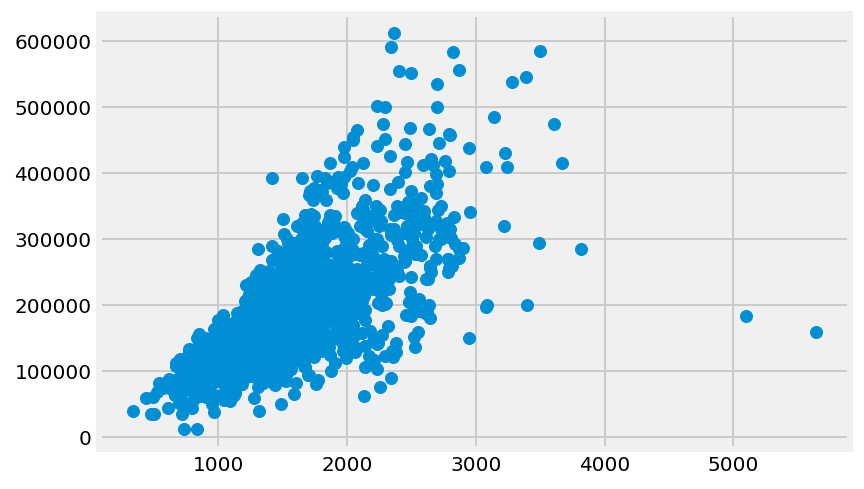

In [1535]:
plt.scatter(x = df_train['Gr Liv Area'], y = df_train['SalePrice'])

In [1536]:
df_train[df_train['Gr Liv Area'] > 5000]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


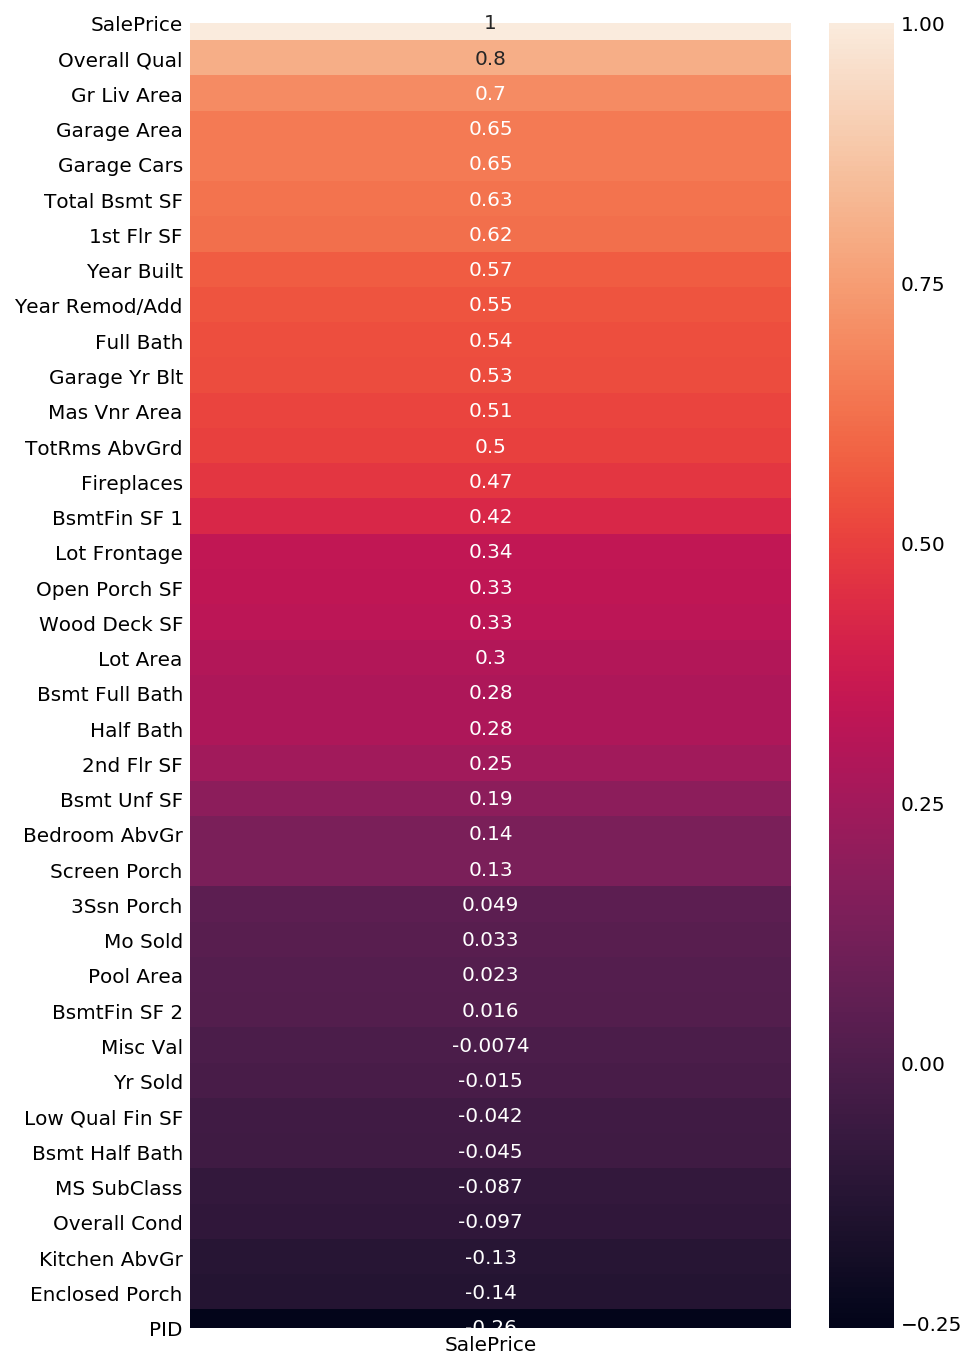

In [1541]:
plt.figure(figsize = (6,12))
sns.heatmap(df_train.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False), annot = True)

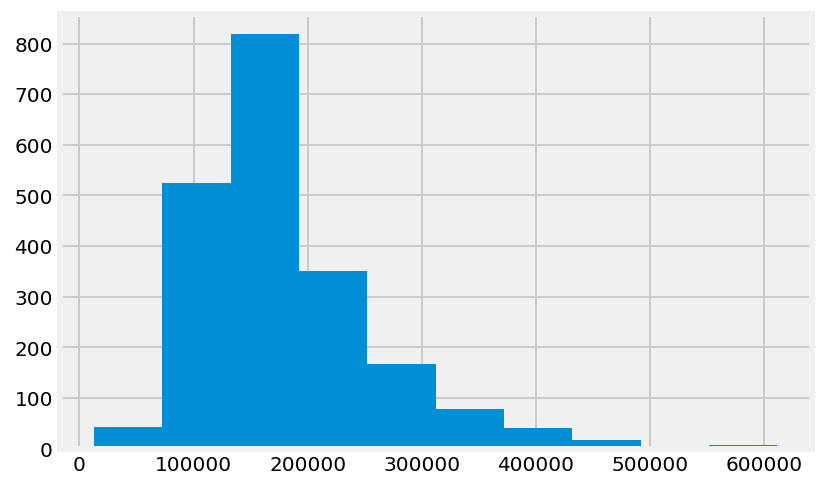

In [1543]:
plt.hist(df_train['SalePrice']);

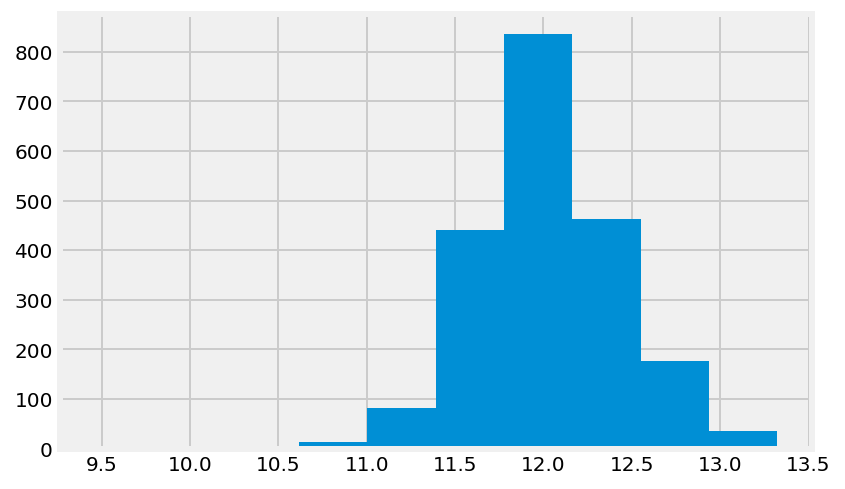

In [1545]:
plt.hist(np.log(df_train['SalePrice']));

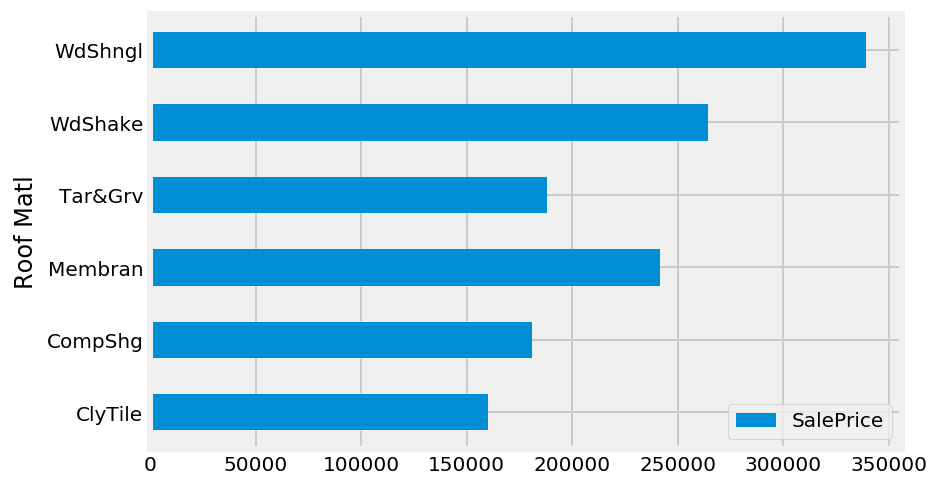

In [1569]:
df_train.groupby(['Roof Matl'])[['SalePrice']].mean().plot(kind = 'barh')

## Cleaning Data ##

In [1446]:
# While running all models, we have found 2 extraordinary outliers
df_train.drop([182, 1554, 2181, 1499], inplace = True)


### Replacing Null Values ###

In [1447]:
# We need to convert the Ordinal string data into numbers to feed into our linear regression model
# Data dictionary provided in this project reveals the ranking system in English. We have interpretted these to numbers. 
# need to provide a link for this in the README

rating_dict = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, np.nan : 0, 'NA': 0}
bsmt_expo_dict = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, np.nan: 0, 'NA': 0}
bsmt_fin_dict = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, np.nan: 0, 'NA': 0}
electrical_dict = {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1, np.nan: 0, 'NA': 0}
fence_dict = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, np.nan: 0, 'NA': 0}
functional_dict = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal':1, np.nan: 0, 'NA': 0}
garage_finish_dict = {'Fin': 3, 'RFn': 2, 'Unf': 1, np.nan: 0, 'NA': 0}
land_slope_dict = {'Gtl': 3, 'Mod': 2, 'Sev': 1, np.nan: 0, 'NA': 0}
lot_shape_dict = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, np.nan: 0, 'NA': 0}
paved_drive_dict = {'Y': 3, 'P': 2, 'N': 1, np.nan: 0, 'NA': 0}
pool_qc_dict = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, np.nan: 0, 'NA': 0}
utilities_dict = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1, np.nan: 0, 'NA': 0}

In [1448]:
# Converting ordinal features from TRAINING data into numbers
df_train['Bsmt Cond'].replace(rating_dict, inplace = True)
df_train['Bsmt Qual'].replace(rating_dict, inplace = True)
df_train['Exter Cond'].replace(rating_dict, inplace = True)
df_train['Exter Qual'].replace(rating_dict, inplace = True)
df_train['Fireplace Qu'].replace(rating_dict, inplace = True)
df_train['Garage Cond'].replace(rating_dict, inplace = True) 
df_train['Garage Qual'].replace(rating_dict, inplace = True)
df_train['Heating QC'].replace(rating_dict, inplace = True)
df_train['Kitchen Qual'].replace(rating_dict, inplace = True)
df_train['BsmtFin Type 1'].replace(bsmt_fin_dict, inplace = True)
df_train['BsmtFin Type 2'].replace(bsmt_fin_dict, inplace = True)
df_train['Bsmt Exposure'].replace(bsmt_expo_dict, inplace = True)
df_train['Electrical'].replace(electrical_dict, inplace = True)
df_train['Fence'].replace(fence_dict, inplace = True)
df_train['Functional'].replace(functional_dict, inplace = True)
df_train['Garage Finish'].replace(garage_finish_dict, inplace = True)
df_train['Land Slope'].replace(land_slope_dict, inplace = True)
df_train['Lot Shape'].replace(lot_shape_dict, inplace = True)
df_train['Paved Drive'].replace(paved_drive_dict, inplace = True)
df_train['Pool QC'].replace(pool_qc_dict, inplace = True)
df_train['Utilities'].replace(utilities_dict, inplace = True)

In [1449]:
# Converting ordinal features from TESTING data into numbers
df_test['Bsmt Cond'].replace(rating_dict, inplace = True)
df_test['Bsmt Qual'].replace(rating_dict, inplace = True)
df_test['Exter Cond'].replace(rating_dict, inplace = True)
df_test['Exter Qual'].replace(rating_dict, inplace = True)
df_test['Fireplace Qu'].replace(rating_dict, inplace = True)
df_test['Garage Cond'].replace(rating_dict, inplace = True) 
df_test['Garage Qual'].replace(rating_dict, inplace = True)
df_test['Heating QC'].replace(rating_dict, inplace = True)
df_test['Kitchen Qual'].replace(rating_dict, inplace = True)
df_test['BsmtFin Type 1'].replace(bsmt_fin_dict, inplace = True)
df_test['BsmtFin Type 2'].replace(bsmt_fin_dict, inplace = True)
df_test['Bsmt Exposure'].replace(bsmt_expo_dict, inplace = True)
df_test['Electrical'].replace(electrical_dict, inplace = True)
df_test['Fence'].replace(fence_dict, inplace = True)
df_test['Functional'].replace(functional_dict, inplace = True)
df_test['Garage Finish'].replace(garage_finish_dict, inplace = True)
df_test['Land Slope'].replace(land_slope_dict, inplace = True)
df_test['Lot Shape'].replace(lot_shape_dict, inplace = True)
df_test['Paved Drive'].replace(paved_drive_dict, inplace = True)
df_test['Pool QC'].replace(pool_qc_dict, inplace = True)
df_test['Utilities'].replace(utilities_dict, inplace = True)

In [1450]:
# checking null values in TRAINING
df_train.isnull().sum().sort_values(ascending = False).head(16)

Misc Feature      1983
Alley             1907
Lot Frontage       330
Garage Yr Blt      114
Garage Type        113
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Area          1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Garage Cars          1
BsmtFin SF 1         1
SalePrice            0
dtype: int64

In [1451]:
# checking null values of TESTING data.
df_test.isnull().sum().sort_values(ascending = False).head(8)

Misc Feature     837
Alley            820
Lot Frontage     160
Garage Yr Blt     45
Garage Type       44
Mas Vnr Type       1
Mas Vnr Area       1
Exter Qual         0
dtype: int64

In [1452]:
# creating dictionary to replace ALL null values
# nominal features will be replaced with 'None'
nominal_dict = {np.nan:'None'}

# Continuous features will be replaced with the mean values of those features.
lot_frontage_dict = {np.nan: df_train['Lot Frontage'].mean()}
mas_vnr_area_dict = {np.nan: df_train['Mas Vnr Area'].mean()}
bsmtFin_SF_2_dict = {np.nan: df_train['BsmtFin SF 2'].mean()}
garage_area_dict = {np.nan: df_train['Garage Area'].mean()}
bmst_unf_sf_dict = {np.nan: df_train['Bsmt Unf SF'].mean()}
total_bsmt_sf_dict = {np.nan: df_train['Total Bsmt SF'].mean()}
bmst_fin_sf_1_dict = {np.nan: df_train['BsmtFin SF 1'].mean()}

# Discrete features will be replaced with the median values
garage_yr_blt_dict = {np.nan: df_train['Garage Yr Blt'].median()}
bsmt_full_bath_dict = {np.nan: df_train['Bsmt Full Bath'].median()}
bsmt_half_bath_dict = {np.nan: df_train['Bsmt Half Bath'].median()}
garage_cars_dict = {np.nan: df_train['Garage Cars'].median()}

In [1453]:
# Replacing nulls in TRAINING data
# Nominal features
df_train['Garage Type'].replace(nominal_dict, inplace = True)
df_train['Mas Vnr Type'].replace(nominal_dict, inplace = True)
df_train['Misc Feature'].replace(nominal_dict, inplace = True)
df_train['Alley'].replace(nominal_dict, inplace = True)

# remaining features
df_train['Lot Frontage'].replace(lot_frontage_dict, inplace = True)
df_train['Mas Vnr Area'].replace(mas_vnr_area_dict, inplace = True)
df_train['Garage Yr Blt'].replace(garage_yr_blt_dict, inplace = True)
df_train['Bsmt Full Bath'].replace(bsmt_full_bath_dict, inplace = True)
df_train['Bsmt Half Bath'].replace(bsmt_half_bath_dict, inplace = True)
df_train['BsmtFin SF 2'].replace(bsmtFin_SF_2_dict, inplace = True)
df_train['Garage Cars'].replace(garage_cars_dict, inplace = True)
df_train['Garage Area'].replace(garage_area_dict, inplace = True)
df_train['Bsmt Unf SF'].replace(bmst_unf_sf_dict, inplace = True)
df_train['Total Bsmt SF'].replace(total_bsmt_sf_dict, inplace = True)
df_train['BsmtFin SF 1'].replace(bmst_fin_sf_1_dict, inplace = True)

In [1454]:
# Replacing nulls in TESTING data
# nominal features
df_test['Garage Type'].replace(nominal_dict, inplace = True)
df_test['Mas Vnr Type'].replace(nominal_dict, inplace = True)
df_test['Misc Feature'].replace(nominal_dict, inplace = True)
df_test['Alley'].replace(nominal_dict, inplace = True)

# remaining features
df_test['Lot Frontage'].replace(lot_frontage_dict, inplace = True)
df_test['Mas Vnr Area'].replace(mas_vnr_area_dict, inplace = True)
df_test['Garage Yr Blt'].replace(garage_yr_blt_dict, inplace = True)
df_test['Bsmt Full Bath'].replace(bsmt_full_bath_dict, inplace = True)
df_test['Bsmt Half Bath'].replace(bsmt_half_bath_dict, inplace = True)
df_test['BsmtFin SF 2'].replace(bsmtFin_SF_2_dict, inplace = True)
df_test['Garage Cars'].replace(garage_cars_dict, inplace = True)
df_test['Garage Area'].replace(garage_area_dict, inplace = True)
df_test['Bsmt Unf SF'].replace(bmst_unf_sf_dict, inplace = True)
df_test['Total Bsmt SF'].replace(total_bsmt_sf_dict, inplace = True)
df_test['BsmtFin SF 1'].replace(bmst_fin_sf_1_dict, inplace = True)

In [1455]:
# checking remaining null values in the TRAINING data
df_train.isnull().sum().sort_values(ascending = False).head(2)

SalePrice    0
Sale Type    0
dtype: int64

In [1456]:
# checking remaining null values in the TESTING data
df_test.isnull().sum().sort_values(ascending = False).head(2)

Sale Type     0
Exter Cond    0
dtype: int64

#### Interaction columns

In [1457]:
# Training interactions
df_train["Mas Vnr Area * Lot Frontage"] = df_train["Mas Vnr Area"] * df_train["Lot Frontage"]
df_train["Bsmt Exposure * Lot Frontage"] = df_train["Bsmt Exposure"] * df_train["Lot Frontage"]
df_train["Electrical * Lot Frontage"] = df_train["Electrical"] * df_train["Lot Frontage"]
df_train["Half Bath * Lot Frontage"] = df_train["Half Bath"] * df_train["Lot Frontage"]
df_train["TotRms AbvGrd * Lot Frontage"] = df_train["TotRms AbvGrd"] * df_train["Lot Frontage"]
df_train["Garage Qual * Lot Frontage"] = df_train["Garage Qual"] * df_train["Lot Frontage"]
df_train["Open Porch SF * Lot Frontage"] = df_train["Open Porch SF"] * df_train["Lot Frontage"]
df_train["BsmtFin Type 1 * Lot Frontage"] = df_train["BsmtFin Type 1"] * df_train["Lot Frontage"]
df_train["Bsmt Full Bath * Lot Frontage"] = df_train["Bsmt Full Bath"] * df_train["Lot Frontage"]
df_train["Functional * Lot Frontage"] = df_train["Functional"] * df_train["Lot Frontage"]
df_train["Garage Finish * Lot Frontage"] = df_train["Garage Finish"] * df_train["Lot Frontage"]
df_train["Garage Cond * Lot Frontage"] = df_train["Garage Cond"] * df_train["Lot Frontage"]
df_train["BsmtFin SF 1 * Lot Frontage"] = df_train["BsmtFin SF 1"] * df_train["Lot Frontage"]
df_train["Fireplaces * Lot Frontage"] = df_train["Fireplaces"] * df_train["Lot Frontage"]
df_train["Paved Drive * Lot Frontage"] = df_train["Paved Drive"] * df_train["Lot Frontage"]
df_train["Utilities * Lot Frontage"] = df_train["Utilities"] * df_train["Lot Frontage"]
df_train["Bsmt Qual * Lot Frontage"] = df_train["Bsmt Qual"] * df_train["Lot Frontage"]
df_train["Heating QC * Lot Frontage"] = df_train["Heating QC"] * df_train["Lot Frontage"]
df_train["Full Bath * Lot Frontage"] = df_train["Full Bath"] * df_train["Lot Frontage"]
df_train["Fireplace Qu * Lot Frontage"] = df_train["Fireplace Qu"] * df_train["Lot Frontage"]
df_train["Wood Deck SF * Lot Frontage"] = df_train["Wood Deck SF"] * df_train["Lot Frontage"]
df_train["Bsmt Cond * Lot Frontage"] = df_train["Bsmt Cond"] * df_train["Lot Frontage"]
df_train["Gr Liv Area * Overall Qual"] = df_train["Gr Liv Area"] * df_train["Overall Qual"]
df_train["TotRms AbvGrd * Overall Qual"] = df_train["TotRms AbvGrd"] * df_train["Overall Qual"]
df_train["Exter Qual * Overall Qual"] = df_train["Exter Qual"] * df_train["Overall Qual"]
df_train["1st Flr SF * Overall Qual"] = df_train["1st Flr SF"] * df_train["Overall Qual"]
df_train["Year Built * Overall Qual"] = df_train["Year Built"] * df_train["Overall Qual"]
df_train["Total Bsmt SF * Overall Qual"] = df_train["Total Bsmt SF"] * df_train["Overall Qual"]
df_train["Garage Cars * Overall Qual"] = df_train["Garage Cars"] * df_train["Overall Qual"]
df_train["Bsmt Qual * Overall Qual"] = df_train["Bsmt Qual"] * df_train["Overall Qual"]
df_train["Kitchen Qual * Overall Qual"] = df_train["Kitchen Qual"] * df_train["Overall Qual"]
df_train["Garage Area * Overall Qual"] = df_train["Garage Area"] * df_train["Overall Qual"]
df_train["Bsmt Exposure * Mas Vnr Area"] = df_train["Bsmt Exposure"] * df_train["Mas Vnr Area"]
df_train["TotRms AbvGrd * Mas Vnr Area"] = df_train["TotRms AbvGrd"] * df_train["Mas Vnr Area"]
df_train["Garage Qual * Mas Vnr Area"] = df_train["Garage Qual"] * df_train["Mas Vnr Area"]
df_train["Garage Finish * Mas Vnr Area"] = df_train["Garage Finish"] * df_train["Mas Vnr Area"]
df_train["BsmtFin SF 1 * Mas Vnr Area"] = df_train["BsmtFin SF 1"] * df_train["Mas Vnr Area"]
df_train["Fireplaces * Mas Vnr Area"] = df_train["Fireplaces"] * df_train["Mas Vnr Area"]
df_train["Heating QC * Mas Vnr Area"] = df_train["Heating QC"] * df_train["Mas Vnr Area"]
df_train["Full Bath * Mas Vnr Area"] = df_train["Full Bath"] * df_train["Mas Vnr Area"]
df_train["Fireplace Qu * Mas Vnr Area"] = df_train["Fireplace Qu"] * df_train["Mas Vnr Area"]
df_train["Electrical * Bsmt Exposure"] = df_train["Electrical"] * df_train["Bsmt Exposure"]
df_train["TotRms AbvGrd * Bsmt Exposure"] = df_train["TotRms AbvGrd"] * df_train["Bsmt Exposure"]
df_train["Garage Qual * Bsmt Exposure"] = df_train["Garage Qual"] * df_train["Bsmt Exposure"]
df_train["Open Porch SF * Bsmt Exposure"] = df_train["Open Porch SF"] * df_train["Bsmt Exposure"]
df_train["BsmtFin Type 1 * Bsmt Exposure"] = df_train["BsmtFin Type 1"] * df_train["Bsmt Exposure"]
df_train["Bedroom AbvGr * Bsmt Exposure"] = df_train["Bedroom AbvGr"] * df_train["Bsmt Exposure"]
df_train["Functional * Bsmt Exposure"] = df_train["Functional"] * df_train["Bsmt Exposure"]
df_train["Garage Finish * Bsmt Exposure"] = df_train["Garage Finish"] * df_train["Bsmt Exposure"]
df_train["Garage Cond * Bsmt Exposure"] = df_train["Garage Cond"] * df_train["Bsmt Exposure"]
df_train["BsmtFin SF 1 * Bsmt Exposure"] = df_train["BsmtFin SF 1"] * df_train["Bsmt Exposure"]
df_train["Fireplaces * Bsmt Exposure"] = df_train["Fireplaces"] * df_train["Bsmt Exposure"]
df_train["Paved Drive * Bsmt Exposure"] = df_train["Paved Drive"] * df_train["Bsmt Exposure"]
df_train["Heating QC * Bsmt Exposure"] = df_train["Heating QC"] * df_train["Bsmt Exposure"]
df_train["Full Bath * Bsmt Exposure"] = df_train["Full Bath"] * df_train["Bsmt Exposure"]
df_train["Fireplace Qu * Bsmt Exposure"] = df_train["Fireplace Qu"] * df_train["Bsmt Exposure"]
df_train["Bsmt Cond * Bsmt Exposure"] = df_train["Bsmt Cond"] * df_train["Bsmt Exposure"]
df_train["Gr Liv Area * Electrical"] = df_train["Gr Liv Area"] * df_train["Electrical"]
df_train["TotRms AbvGrd * Electrical"] = df_train["TotRms AbvGrd"] * df_train["Electrical"]
df_train["Garage Qual * Electrical"] = df_train["Garage Qual"] * df_train["Electrical"]
df_train["Open Porch SF * Electrical"] = df_train["Open Porch SF"] * df_train["Electrical"]
df_train["Lot Area * Electrical"] = df_train["Lot Area"] * df_train["Electrical"]
df_train["BsmtFin Type 1 * Electrical"] = df_train["BsmtFin Type 1"] * df_train["Electrical"]
df_train["1st Flr SF * Electrical"] = df_train["1st Flr SF"] * df_train["Electrical"]
df_train["Garage Finish * Electrical"] = df_train["Garage Finish"] * df_train["Electrical"]
df_train["Garage Cond * Electrical"] = df_train["Garage Cond"] * df_train["Electrical"]
df_train["BsmtFin SF 1 * Electrical"] = df_train["BsmtFin SF 1"] * df_train["Electrical"]
df_train["Total Bsmt SF * Electrical"] = df_train["Total Bsmt SF"] * df_train["Electrical"]
df_train["Fireplaces * Electrical"] = df_train["Fireplaces"] * df_train["Electrical"]
df_train["Garage Cars * Electrical"] = df_train["Garage Cars"] * df_train["Electrical"]
df_train["Paved Drive * Electrical"] = df_train["Paved Drive"] * df_train["Electrical"]
df_train["Bsmt Qual * Electrical"] = df_train["Bsmt Qual"] * df_train["Electrical"]
df_train["Heating QC * Electrical"] = df_train["Heating QC"] * df_train["Electrical"]
df_train["Full Bath * Electrical"] = df_train["Full Bath"] * df_train["Electrical"]
df_train["Fireplace Qu * Electrical"] = df_train["Fireplace Qu"] * df_train["Electrical"]
df_train["Garage Area * Electrical"] = df_train["Garage Area"] * df_train["Electrical"]
df_train["Wood Deck SF * Electrical"] = df_train["Wood Deck SF"] * df_train["Electrical"]
df_train["Exter Qual * Gr Liv Area"] = df_train["Exter Qual"] * df_train["Gr Liv Area"]
df_train["1st Flr SF * Gr Liv Area"] = df_train["1st Flr SF"] * df_train["Gr Liv Area"]
df_train["Functional * Gr Liv Area"] = df_train["Functional"] * df_train["Gr Liv Area"]
df_train["Garage Finish * Gr Liv Area"] = df_train["Garage Finish"] * df_train["Gr Liv Area"]
df_train["Year Built * Gr Liv Area"] = df_train["Year Built"] * df_train["Gr Liv Area"]
df_train["Total Bsmt SF * Gr Liv Area"] = df_train["Total Bsmt SF"] * df_train["Gr Liv Area"]
df_train["Garage Cars * Gr Liv Area"] = df_train["Garage Cars"] * df_train["Gr Liv Area"]
df_train["Paved Drive * Gr Liv Area"] = df_train["Paved Drive"] * df_train["Gr Liv Area"]
df_train["Bsmt Qual * Gr Liv Area"] = df_train["Bsmt Qual"] * df_train["Gr Liv Area"]
df_train["Heating QC * Gr Liv Area"] = df_train["Heating QC"] * df_train["Gr Liv Area"]
df_train["Kitchen Qual * Gr Liv Area"] = df_train["Kitchen Qual"] * df_train["Gr Liv Area"]
df_train["Garage Area * Gr Liv Area"] = df_train["Garage Area"] * df_train["Gr Liv Area"]
df_train["Garage Qual * Half Bath"] = df_train["Garage Qual"] * df_train["Half Bath"]
df_train["Open Porch SF * Half Bath"] = df_train["Open Porch SF"] * df_train["Half Bath"]
df_train["Lot Area * Half Bath"] = df_train["Lot Area"] * df_train["Half Bath"]
df_train["Bsmt Full Bath * Half Bath"] = df_train["Bsmt Full Bath"] * df_train["Half Bath"]
df_train["Garage Cond * Half Bath"] = df_train["Garage Cond"] * df_train["Half Bath"]
df_train["2nd Flr SF * Half Bath"] = df_train["2nd Flr SF"] * df_train["Half Bath"]
df_train["Garage Qual * TotRms AbvGrd"] = df_train["Garage Qual"] * df_train["TotRms AbvGrd"]
df_train["Exter Qual * TotRms AbvGrd"] = df_train["Exter Qual"] * df_train["TotRms AbvGrd"]
df_train["BsmtFin Type 1 * TotRms AbvGrd"] = df_train["BsmtFin Type 1"] * df_train["TotRms AbvGrd"]
df_train["1st Flr SF * TotRms AbvGrd"] = df_train["1st Flr SF"] * df_train["TotRms AbvGrd"]
df_train["Functional * TotRms AbvGrd"] = df_train["Functional"] * df_train["TotRms AbvGrd"]
df_train["Garage Finish * TotRms AbvGrd"] = df_train["Garage Finish"] * df_train["TotRms AbvGrd"]
df_train["Garage Cond * TotRms AbvGrd"] = df_train["Garage Cond"] * df_train["TotRms AbvGrd"]
df_train["BsmtFin SF 1 * TotRms AbvGrd"] = df_train["BsmtFin SF 1"] * df_train["TotRms AbvGrd"]
df_train["Total Bsmt SF * TotRms AbvGrd"] = df_train["Total Bsmt SF"] * df_train["TotRms AbvGrd"]
df_train["Fireplaces * TotRms AbvGrd"] = df_train["Fireplaces"] * df_train["TotRms AbvGrd"]
df_train["Garage Cars * TotRms AbvGrd"] = df_train["Garage Cars"] * df_train["TotRms AbvGrd"]
df_train["Paved Drive * TotRms AbvGrd"] = df_train["Paved Drive"] * df_train["TotRms AbvGrd"]
df_train["Bsmt Qual * TotRms AbvGrd"] = df_train["Bsmt Qual"] * df_train["TotRms AbvGrd"]
df_train["Heating QC * TotRms AbvGrd"] = df_train["Heating QC"] * df_train["TotRms AbvGrd"]
df_train["Full Bath * TotRms AbvGrd"] = df_train["Full Bath"] * df_train["TotRms AbvGrd"]
df_train["Kitchen Qual * TotRms AbvGrd"] = df_train["Kitchen Qual"] * df_train["TotRms AbvGrd"]
df_train["Fireplace Qu * TotRms AbvGrd"] = df_train["Fireplace Qu"] * df_train["TotRms AbvGrd"]
df_train["Garage Area * TotRms AbvGrd"] = df_train["Garage Area"] * df_train["TotRms AbvGrd"]
df_train["Bsmt Cond * TotRms AbvGrd"] = df_train["Bsmt Cond"] * df_train["TotRms AbvGrd"]
df_train["Open Porch SF * Garage Qual"] = df_train["Open Porch SF"] * df_train["Garage Qual"]
df_train["Lot Area * Garage Qual"] = df_train["Lot Area"] * df_train["Garage Qual"]
df_train["BsmtFin Type 1 * Garage Qual"] = df_train["BsmtFin Type 1"] * df_train["Garage Qual"]
df_train["Bsmt Full Bath * Garage Qual"] = df_train["Bsmt Full Bath"] * df_train["Garage Qual"]
df_train["Garage Finish * Garage Qual"] = df_train["Garage Finish"] * df_train["Garage Qual"]
df_train["BsmtFin SF 1 * Garage Qual"] = df_train["BsmtFin SF 1"] * df_train["Garage Qual"]
df_train["Total Bsmt SF * Garage Qual"] = df_train["Total Bsmt SF"] * df_train["Garage Qual"]
df_train["Fireplaces * Garage Qual"] = df_train["Fireplaces"] * df_train["Garage Qual"]
df_train["Garage Cars * Garage Qual"] = df_train["Garage Cars"] * df_train["Garage Qual"]
df_train["Paved Drive * Garage Qual"] = df_train["Paved Drive"] * df_train["Garage Qual"]
df_train["Heating QC * Garage Qual"] = df_train["Heating QC"] * df_train["Garage Qual"]
df_train["Full Bath * Garage Qual"] = df_train["Full Bath"] * df_train["Garage Qual"]
df_train["Fireplace Qu * Garage Qual"] = df_train["Fireplace Qu"] * df_train["Garage Qual"]
df_train["Garage Area * Garage Qual"] = df_train["Garage Area"] * df_train["Garage Qual"]
df_train["Wood Deck SF * Garage Qual"] = df_train["Wood Deck SF"] * df_train["Garage Qual"]
df_train["Bsmt Cond * Garage Qual"] = df_train["Bsmt Cond"] * df_train["Garage Qual"]
df_train["Lot Area * Open Porch SF"] = df_train["Lot Area"] * df_train["Open Porch SF"]
df_train["BsmtFin Type 1 * Open Porch SF"] = df_train["BsmtFin Type 1"] * df_train["Open Porch SF"]
df_train["Bsmt Full Bath * Open Porch SF"] = df_train["Bsmt Full Bath"] * df_train["Open Porch SF"]
df_train["Functional * Open Porch SF"] = df_train["Functional"] * df_train["Open Porch SF"]
df_train["Garage Cond * Open Porch SF"] = df_train["Garage Cond"] * df_train["Open Porch SF"]
df_train["Paved Drive * Open Porch SF"] = df_train["Paved Drive"] * df_train["Open Porch SF"]
df_train["Wood Deck SF * Open Porch SF"] = df_train["Wood Deck SF"] * df_train["Open Porch SF"]
df_train["Bsmt Cond * Open Porch SF"] = df_train["Bsmt Cond"] * df_train["Open Porch SF"]
df_train["BsmtFin Type 1 * Lot Area"] = df_train["BsmtFin Type 1"] * df_train["Lot Area"]
df_train["Bsmt Unf SF * Lot Area"] = df_train["Bsmt Unf SF"] * df_train["Lot Area"]
df_train["Bsmt Full Bath * Lot Area"] = df_train["Bsmt Full Bath"] * df_train["Lot Area"]
df_train["Functional * Lot Area"] = df_train["Functional"] * df_train["Lot Area"]
df_train["Garage Cond * Lot Area"] = df_train["Garage Cond"] * df_train["Lot Area"]
df_train["Exter Cond * Lot Area"] = df_train["Exter Cond"] * df_train["Lot Area"]
df_train["2nd Flr SF * Lot Area"] = df_train["2nd Flr SF"] * df_train["Lot Area"]
df_train["Paved Drive * Lot Area"] = df_train["Paved Drive"] * df_train["Lot Area"]
df_train["Utilities * Lot Area"] = df_train["Utilities"] * df_train["Lot Area"]
df_train["Wood Deck SF * Lot Area"] = df_train["Wood Deck SF"] * df_train["Lot Area"]
df_train["Land Slope * Lot Area"] = df_train["Land Slope"] * df_train["Lot Area"]
df_train["Bsmt Cond * Lot Area"] = df_train["Bsmt Cond"] * df_train["Lot Area"]
df_train["1st Flr SF * Exter Qual"] = df_train["1st Flr SF"] * df_train["Exter Qual"]
df_train["Year Built * Exter Qual"] = df_train["Year Built"] * df_train["Exter Qual"]
df_train["Total Bsmt SF * Exter Qual"] = df_train["Total Bsmt SF"] * df_train["Exter Qual"]
df_train["Garage Cars * Exter Qual"] = df_train["Garage Cars"] * df_train["Exter Qual"]
df_train["Bsmt Qual * Exter Qual"] = df_train["Bsmt Qual"] * df_train["Exter Qual"]
df_train["Kitchen Qual * Exter Qual"] = df_train["Kitchen Qual"] * df_train["Exter Qual"]
df_train["Garage Area * Exter Qual"] = df_train["Garage Area"] * df_train["Exter Qual"]
df_train["Bsmt Unf SF * BsmtFin Type 1"] = df_train["Bsmt Unf SF"] * df_train["BsmtFin Type 1"]
df_train["Bsmt Full Bath * BsmtFin Type 1"] = df_train["Bsmt Full Bath"] * df_train["BsmtFin Type 1"]
df_train["Bedroom AbvGr * BsmtFin Type 1"] = df_train["Bedroom AbvGr"] * df_train["BsmtFin Type 1"]
df_train["Functional * BsmtFin Type 1"] = df_train["Functional"] * df_train["BsmtFin Type 1"]
df_train["Garage Cond * BsmtFin Type 1"] = df_train["Garage Cond"] * df_train["BsmtFin Type 1"]
df_train["BsmtFin SF 1 * BsmtFin Type 1"] = df_train["BsmtFin SF 1"] * df_train["BsmtFin Type 1"]
df_train["Fireplaces * BsmtFin Type 1"] = df_train["Fireplaces"] * df_train["BsmtFin Type 1"]
df_train["Paved Drive * BsmtFin Type 1"] = df_train["Paved Drive"] * df_train["BsmtFin Type 1"]
df_train["Fireplace Qu * BsmtFin Type 1"] = df_train["Fireplace Qu"] * df_train["BsmtFin Type 1"]
df_train["Wood Deck SF * BsmtFin Type 1"] = df_train["Wood Deck SF"] * df_train["BsmtFin Type 1"]
df_train["Bsmt Cond * BsmtFin Type 1"] = df_train["Bsmt Cond"] * df_train["BsmtFin Type 1"]
df_train["Bsmt Full Bath * Bsmt Unf SF"] = df_train["Bsmt Full Bath"] * df_train["Bsmt Unf SF"]
df_train["BsmtFin SF 1 * Bsmt Unf SF"] = df_train["BsmtFin SF 1"] * df_train["Bsmt Unf SF"]
df_train["Wood Deck SF * Bsmt Unf SF"] = df_train["Wood Deck SF"] * df_train["Bsmt Unf SF"]
df_train["Functional * 1st Flr SF"] = df_train["Functional"] * df_train["1st Flr SF"]
df_train["Garage Finish * 1st Flr SF"] = df_train["Garage Finish"] * df_train["1st Flr SF"]
df_train["Year Built * 1st Flr SF"] = df_train["Year Built"] * df_train["1st Flr SF"]
df_train["Total Bsmt SF * 1st Flr SF"] = df_train["Total Bsmt SF"] * df_train["1st Flr SF"]
df_train["Garage Cars * 1st Flr SF"] = df_train["Garage Cars"] * df_train["1st Flr SF"]
df_train["Paved Drive * 1st Flr SF"] = df_train["Paved Drive"] * df_train["1st Flr SF"]
df_train["Bsmt Qual * 1st Flr SF"] = df_train["Bsmt Qual"] * df_train["1st Flr SF"]
df_train["Heating QC * 1st Flr SF"] = df_train["Heating QC"] * df_train["1st Flr SF"]
df_train["Full Bath * 1st Flr SF"] = df_train["Full Bath"] * df_train["1st Flr SF"]
df_train["Kitchen Qual * 1st Flr SF"] = df_train["Kitchen Qual"] * df_train["1st Flr SF"]
df_train["Fireplace Qu * 1st Flr SF"] = df_train["Fireplace Qu"] * df_train["1st Flr SF"]
df_train["Garage Area * 1st Flr SF"] = df_train["Garage Area"] * df_train["1st Flr SF"]
df_train["Bsmt Cond * 1st Flr SF"] = df_train["Bsmt Cond"] * df_train["1st Flr SF"]
df_train["Garage Cond * Bsmt Full Bath"] = df_train["Garage Cond"] * df_train["Bsmt Full Bath"]
df_train["BsmtFin SF 1 * Bsmt Full Bath"] = df_train["BsmtFin SF 1"] * df_train["Bsmt Full Bath"]
df_train["Paved Drive * Bsmt Full Bath"] = df_train["Paved Drive"] * df_train["Bsmt Full Bath"]
df_train["BsmtFin SF 1 * Functional"] = df_train["BsmtFin SF 1"] * df_train["Functional"]
df_train["Total Bsmt SF * Functional"] = df_train["Total Bsmt SF"] * df_train["Functional"]
df_train["Fireplaces * Functional"] = df_train["Fireplaces"] * df_train["Functional"]
df_train["Garage Cars * Functional"] = df_train["Garage Cars"] * df_train["Functional"]
df_train["Heating QC * Functional"] = df_train["Heating QC"] * df_train["Functional"]
df_train["Full Bath * Functional"] = df_train["Full Bath"] * df_train["Functional"]
df_train["Fireplace Qu * Functional"] = df_train["Fireplace Qu"] * df_train["Functional"]
df_train["Garage Area * Functional"] = df_train["Garage Area"] * df_train["Functional"]
df_train["Wood Deck SF * Functional"] = df_train["Wood Deck SF"] * df_train["Functional"]
df_train["BsmtFin SF 1 * Garage Finish"] = df_train["BsmtFin SF 1"] * df_train["Garage Finish"]
df_train["Total Bsmt SF * Garage Finish"] = df_train["Total Bsmt SF"] * df_train["Garage Finish"]
df_train["Fireplaces * Garage Finish"] = df_train["Fireplaces"] * df_train["Garage Finish"]
df_train["Garage Cars * Garage Finish"] = df_train["Garage Cars"] * df_train["Garage Finish"]
df_train["Paved Drive * Garage Finish"] = df_train["Paved Drive"] * df_train["Garage Finish"]
df_train["Bsmt Qual * Garage Finish"] = df_train["Bsmt Qual"] * df_train["Garage Finish"]
df_train["Heating QC * Garage Finish"] = df_train["Heating QC"] * df_train["Garage Finish"]
df_train["Full Bath * Garage Finish"] = df_train["Full Bath"] * df_train["Garage Finish"]
df_train["Fireplace Qu * Garage Finish"] = df_train["Fireplace Qu"] * df_train["Garage Finish"]
df_train["Garage Area * Garage Finish"] = df_train["Garage Area"] * df_train["Garage Finish"]
df_train["Bsmt Cond * Garage Finish"] = df_train["Bsmt Cond"] * df_train["Garage Finish"]
df_train["BsmtFin SF 1 * Garage Cond"] = df_train["BsmtFin SF 1"] * df_train["Garage Cond"]
df_train["Total Bsmt SF * Garage Cond"] = df_train["Total Bsmt SF"] * df_train["Garage Cond"]
df_train["Fireplaces * Garage Cond"] = df_train["Fireplaces"] * df_train["Garage Cond"]
df_train["Garage Cars * Garage Cond"] = df_train["Garage Cars"] * df_train["Garage Cond"]
df_train["Paved Drive * Garage Cond"] = df_train["Paved Drive"] * df_train["Garage Cond"]
df_train["Heating QC * Garage Cond"] = df_train["Heating QC"] * df_train["Garage Cond"]
df_train["Full Bath * Garage Cond"] = df_train["Full Bath"] * df_train["Garage Cond"]
df_train["Fireplace Qu * Garage Cond"] = df_train["Fireplace Qu"] * df_train["Garage Cond"]
df_train["Wood Deck SF * Garage Cond"] = df_train["Wood Deck SF"] * df_train["Garage Cond"]
df_train["Bsmt Cond * Garage Cond"] = df_train["Bsmt Cond"] * df_train["Garage Cond"]
df_train["Total Bsmt SF * Year Built"] = df_train["Total Bsmt SF"] * df_train["Year Built"]
df_train["Garage Cars * Year Built"] = df_train["Garage Cars"] * df_train["Year Built"]
df_train["Bsmt Qual * Year Built"] = df_train["Bsmt Qual"] * df_train["Year Built"]
df_train["Kitchen Qual * Year Built"] = df_train["Kitchen Qual"] * df_train["Year Built"]
df_train["Garage Area * Year Built"] = df_train["Garage Area"] * df_train["Year Built"]
df_train["Fireplaces * BsmtFin SF 1"] = df_train["Fireplaces"] * df_train["BsmtFin SF 1"]
df_train["Paved Drive * BsmtFin SF 1"] = df_train["Paved Drive"] * df_train["BsmtFin SF 1"]
df_train["Heating QC * BsmtFin SF 1"] = df_train["Heating QC"] * df_train["BsmtFin SF 1"]
df_train["Full Bath * BsmtFin SF 1"] = df_train["Full Bath"] * df_train["BsmtFin SF 1"]
df_train["Fireplace Qu * BsmtFin SF 1"] = df_train["Fireplace Qu"] * df_train["BsmtFin SF 1"]
df_train["Bsmt Cond * BsmtFin SF 1"] = df_train["Bsmt Cond"] * df_train["BsmtFin SF 1"]
df_train["Garage Cars * Total Bsmt SF"] = df_train["Garage Cars"] * df_train["Total Bsmt SF"]
df_train["Paved Drive * Total Bsmt SF"] = df_train["Paved Drive"] * df_train["Total Bsmt SF"]
df_train["Bsmt Qual * Total Bsmt SF"] = df_train["Bsmt Qual"] * df_train["Total Bsmt SF"]
df_train["Heating QC * Total Bsmt SF"] = df_train["Heating QC"] * df_train["Total Bsmt SF"]
df_train["Full Bath * Total Bsmt SF"] = df_train["Full Bath"] * df_train["Total Bsmt SF"]
df_train["Kitchen Qual * Total Bsmt SF"] = df_train["Kitchen Qual"] * df_train["Total Bsmt SF"]
df_train["Fireplace Qu * Total Bsmt SF"] = df_train["Fireplace Qu"] * df_train["Total Bsmt SF"]
df_train["Garage Area * Total Bsmt SF"] = df_train["Garage Area"] * df_train["Total Bsmt SF"]
df_train["Bsmt Cond * Total Bsmt SF"] = df_train["Bsmt Cond"] * df_train["Total Bsmt SF"]
df_train["Paved Drive * Fireplaces"] = df_train["Paved Drive"] * df_train["Fireplaces"]
df_train["Utilities * Fireplaces"] = df_train["Utilities"] * df_train["Fireplaces"]
df_train["Heating QC * Fireplaces"] = df_train["Heating QC"] * df_train["Fireplaces"]
df_train["Full Bath * Fireplaces"] = df_train["Full Bath"] * df_train["Fireplaces"]
df_train["Bsmt Cond * Fireplaces"] = df_train["Bsmt Cond"] * df_train["Fireplaces"]
df_train["Paved Drive * Garage Cars"] = df_train["Paved Drive"] * df_train["Garage Cars"]
df_train["Utilities * Garage Cars"] = df_train["Utilities"] * df_train["Garage Cars"]
df_train["Bsmt Qual * Garage Cars"] = df_train["Bsmt Qual"] * df_train["Garage Cars"]
df_train["Heating QC * Garage Cars"] = df_train["Heating QC"] * df_train["Garage Cars"]
df_train["Full Bath * Garage Cars"] = df_train["Full Bath"] * df_train["Garage Cars"]
df_train["Kitchen Qual * Garage Cars"] = df_train["Kitchen Qual"] * df_train["Garage Cars"]
df_train["Fireplace Qu * Garage Cars"] = df_train["Fireplace Qu"] * df_train["Garage Cars"]
df_train["Garage Area * Garage Cars"] = df_train["Garage Area"] * df_train["Garage Cars"]
df_train["Bsmt Cond * Garage Cars"] = df_train["Bsmt Cond"] * df_train["Garage Cars"]
df_train["Heating QC * Paved Drive"] = df_train["Heating QC"] * df_train["Paved Drive"]
df_train["Full Bath * Paved Drive"] = df_train["Full Bath"] * df_train["Paved Drive"]
df_train["Fireplace Qu * Paved Drive"] = df_train["Fireplace Qu"] * df_train["Paved Drive"]
df_train["Garage Area * Paved Drive"] = df_train["Garage Area"] * df_train["Paved Drive"]
df_train["Wood Deck SF * Paved Drive"] = df_train["Wood Deck SF"] * df_train["Paved Drive"]
df_train["Bsmt Cond * Paved Drive"] = df_train["Bsmt Cond"] * df_train["Paved Drive"]
df_train["Fireplace Qu * Utilities"] = df_train["Fireplace Qu"] * df_train["Utilities"]
df_train["Garage Area * Utilities"] = df_train["Garage Area"] * df_train["Utilities"]
df_train["Heating QC * Bsmt Qual"] = df_train["Heating QC"] * df_train["Bsmt Qual"]
df_train["Full Bath * Bsmt Qual"] = df_train["Full Bath"] * df_train["Bsmt Qual"]
df_train["Kitchen Qual * Bsmt Qual"] = df_train["Kitchen Qual"] * df_train["Bsmt Qual"]
df_train["Fireplace Qu * Bsmt Qual"] = df_train["Fireplace Qu"] * df_train["Bsmt Qual"]
df_train["Garage Area * Bsmt Qual"] = df_train["Garage Area"] * df_train["Bsmt Qual"]
df_train["Full Bath * Heating QC"] = df_train["Full Bath"] * df_train["Heating QC"]
df_train["Fireplace Qu * Heating QC"] = df_train["Fireplace Qu"] * df_train["Heating QC"]
df_train["Garage Area * Heating QC"] = df_train["Garage Area"] * df_train["Heating QC"]
df_train["Bsmt Cond * Heating QC"] = df_train["Bsmt Cond"] * df_train["Heating QC"]
df_train["Garage Area * Kitchen Qual"] = df_train["Garage Area"] * df_train["Kitchen Qual"]
df_train["Garage Area * Fireplace Qu"] = df_train["Garage Area"] * df_train["Fireplace Qu"]
df_train["Bsmt Cond * Fireplace Qu"] = df_train["Bsmt Cond"] * df_train["Fireplace Qu"]
df_train["Bsmt Cond * Garage Area"] = df_train["Bsmt Cond"] * df_train["Garage Area"]
df_train["Bsmt Cond * Wood Deck SF"] = df_train["Bsmt Cond"] * df_train["Wood Deck SF"]
df_train["Garage Yr Blt * Overall Qual"] = df_train["Garage Yr Blt"] * df_train["Overall Qual"]
df_train["Year Remod/Add * Overall Qual"] = df_train["Year Remod/Add"] * df_train["Overall Qual"]
df_train["Garage Yr Blt * Mas Vnr Area"] = df_train["Garage Yr Blt"] * df_train["Mas Vnr Area"]
df_train["Lot Frontage * Mas Vnr Area"] = df_train["Lot Frontage"] * df_train["Mas Vnr Area"]
df_train["Yr Sold * Mas Vnr Area"] = df_train["Yr Sold"] * df_train["Mas Vnr Area"]
df_train["Lot Frontage * Bsmt Exposure"] = df_train["Lot Frontage"] * df_train["Bsmt Exposure"]
df_train["Yr Sold * Bsmt Exposure"] = df_train["Yr Sold"] * df_train["Bsmt Exposure"]
df_train["Lot Frontage * Electrical"] = df_train["Lot Frontage"] * df_train["Electrical"]
df_train["Garage Yr Blt * Gr Liv Area"] = df_train["Garage Yr Blt"] * df_train["Gr Liv Area"]
df_train["Year Remod/Add * Gr Liv Area"] = df_train["Year Remod/Add"] * df_train["Gr Liv Area"]
df_train["Garage Yr Blt * TotRms AbvGrd"] = df_train["Garage Yr Blt"] * df_train["TotRms AbvGrd"]
df_train["Lot Frontage * TotRms AbvGrd"] = df_train["Lot Frontage"] * df_train["TotRms AbvGrd"]
df_train["Lot Frontage * Garage Qual"] = df_train["Lot Frontage"] * df_train["Garage Qual"]
df_train["Lot Frontage * Open Porch SF"] = df_train["Lot Frontage"] * df_train["Open Porch SF"]
df_train["Yr Sold * Open Porch SF"] = df_train["Yr Sold"] * df_train["Open Porch SF"]
df_train["Yr Sold * Lot Area"] = df_train["Yr Sold"] * df_train["Lot Area"]
df_train["Garage Yr Blt * Exter Qual"] = df_train["Garage Yr Blt"] * df_train["Exter Qual"]
df_train["Year Remod/Add * Exter Qual"] = df_train["Year Remod/Add"] * df_train["Exter Qual"]
df_train["Lot Frontage * BsmtFin Type 1"] = df_train["Lot Frontage"] * df_train["BsmtFin Type 1"]
df_train["Garage Yr Blt * 1st Flr SF"] = df_train["Garage Yr Blt"] * df_train["1st Flr SF"]
df_train["Year Remod/Add * 1st Flr SF"] = df_train["Year Remod/Add"] * df_train["1st Flr SF"]
df_train["Lot Frontage * Bsmt Full Bath"] = df_train["Lot Frontage"] * df_train["Bsmt Full Bath"]
df_train["Lot Frontage * Functional"] = df_train["Lot Frontage"] * df_train["Functional"]
df_train["Garage Yr Blt * Garage Finish"] = df_train["Garage Yr Blt"] * df_train["Garage Finish"]
df_train["Lot Frontage * Garage Finish"] = df_train["Lot Frontage"] * df_train["Garage Finish"]
df_train["Year Remod/Add * Garage Finish"] = df_train["Year Remod/Add"] * df_train["Garage Finish"]
df_train["Lot Frontage * Garage Cond"] = df_train["Lot Frontage"] * df_train["Garage Cond"]
df_train["Garage Yr Blt * Year Built"] = df_train["Garage Yr Blt"] * df_train["Year Built"]
df_train["Year Remod/Add * Year Built"] = df_train["Year Remod/Add"] * df_train["Year Built"]
df_train["Lot Frontage * BsmtFin SF 1"] = df_train["Lot Frontage"] * df_train["BsmtFin SF 1"]
df_train["Yr Sold * BsmtFin SF 1"] = df_train["Yr Sold"] * df_train["BsmtFin SF 1"]
df_train["Garage Yr Blt * Total Bsmt SF"] = df_train["Garage Yr Blt"] * df_train["Total Bsmt SF"]
df_train["Year Remod/Add * Total Bsmt SF"] = df_train["Year Remod/Add"] * df_train["Total Bsmt SF"]
df_train["Lot Frontage * Fireplaces"] = df_train["Lot Frontage"] * df_train["Fireplaces"]
df_train["Garage Yr Blt * Garage Cars"] = df_train["Garage Yr Blt"] * df_train["Garage Cars"]
df_train["Year Remod/Add * Garage Cars"] = df_train["Year Remod/Add"] * df_train["Garage Cars"]
df_train["Lot Frontage * Paved Drive"] = df_train["Lot Frontage"] * df_train["Paved Drive"]
df_train["Lot Frontage * Utilities"] = df_train["Lot Frontage"] * df_train["Utilities"]
df_train["Garage Yr Blt * Bsmt Qual"] = df_train["Garage Yr Blt"] * df_train["Bsmt Qual"]
df_train["Lot Frontage * Bsmt Qual"] = df_train["Lot Frontage"] * df_train["Bsmt Qual"]
df_train["Year Remod/Add * Bsmt Qual"] = df_train["Year Remod/Add"] * df_train["Bsmt Qual"]
df_train["Lot Frontage * Full Bath"] = df_train["Lot Frontage"] * df_train["Full Bath"]
df_train["Garage Yr Blt * Kitchen Qual"] = df_train["Garage Yr Blt"] * df_train["Kitchen Qual"]
df_train["Year Remod/Add * Kitchen Qual"] = df_train["Year Remod/Add"] * df_train["Kitchen Qual"]
df_train["Garage Yr Blt * Fireplace Qu"] = df_train["Garage Yr Blt"] * df_train["Fireplace Qu"]
df_train["Lot Frontage * Fireplace Qu"] = df_train["Lot Frontage"] * df_train["Fireplace Qu"]
df_train["Garage Yr Blt * Garage Area"] = df_train["Garage Yr Blt"] * df_train["Garage Area"]
df_train["Year Remod/Add * Garage Area"] = df_train["Year Remod/Add"] * df_train["Garage Area"]
df_train["Lot Frontage * Wood Deck SF"] = df_train["Lot Frontage"] * df_train["Wood Deck SF"]
df_train["Lot Frontage * Bsmt Cond"] = df_train["Lot Frontage"] * df_train["Bsmt Cond"]
df_train["Year Remod/Add * Garage Yr Blt"] = df_train["Year Remod/Add"] * df_train["Garage Yr Blt"]
df_train["Half Bath * Electrical"] = df_train["Half Bath"] * df_train["Electrical"]
df_train["Bsmt Full Bath * Electrical"] = df_train["Bsmt Full Bath"] * df_train["Electrical"]
df_train["Functional * Electrical"] = df_train["Functional"] * df_train["Electrical"]
df_train["2nd Flr SF * Electrical"] = df_train["2nd Flr SF"] * df_train["Electrical"]
df_train["Bsmt Cond * Electrical"] = df_train["Bsmt Cond"] * df_train["Electrical"]
df_train["Bsmt Unf SF * Half Bath"] = df_train["Bsmt Unf SF"] * df_train["Half Bath"]
df_train["Bedroom AbvGr * Half Bath"] = df_train["Bedroom AbvGr"] * df_train["Half Bath"]
df_train["Functional * Half Bath"] = df_train["Functional"] * df_train["Half Bath"]
df_train["Bedroom AbvGr * Garage Qual"] = df_train["Bedroom AbvGr"] * df_train["Garage Qual"]
df_train["Functional * Garage Qual"] = df_train["Functional"] * df_train["Garage Qual"]
df_train["Garage Cond * Garage Qual"] = df_train["Garage Cond"] * df_train["Garage Qual"]
df_train["2nd Flr SF * Garage Qual"] = df_train["2nd Flr SF"] * df_train["Garage Qual"]
df_train["Bedroom AbvGr * Bsmt Unf SF"] = df_train["Bedroom AbvGr"] * df_train["Bsmt Unf SF"]
df_train["Functional * Bsmt Unf SF"] = df_train["Functional"] * df_train["Bsmt Unf SF"]
df_train["2nd Flr SF * Bsmt Unf SF"] = df_train["2nd Flr SF"] * df_train["Bsmt Unf SF"]
df_train["Functional * Bsmt Full Bath"] = df_train["Functional"] * df_train["Bsmt Full Bath"]
df_train["Bsmt Cond * Bsmt Full Bath"] = df_train["Bsmt Cond"] * df_train["Bsmt Full Bath"]
df_train["Garage Cond * Bedroom AbvGr"] = df_train["Garage Cond"] * df_train["Bedroom AbvGr"]
df_train["2nd Flr SF * Bedroom AbvGr"] = df_train["2nd Flr SF"] * df_train["Bedroom AbvGr"]
df_train["Garage Cond * Functional"] = df_train["Garage Cond"] * df_train["Functional"]
df_train["2nd Flr SF * Functional"] = df_train["2nd Flr SF"] * df_train["Functional"]
df_train["Paved Drive * Functional"] = df_train["Paved Drive"] * df_train["Functional"]
df_train["Bsmt Cond * Functional"] = df_train["Bsmt Cond"] * df_train["Functional"]
df_train["2nd Flr SF * Garage Cond"] = df_train["2nd Flr SF"] * df_train["Garage Cond"]
df_train["Bsmt Cond * 2nd Flr SF"] = df_train["Bsmt Cond"] * df_train["2nd Flr SF"]
df_train["Yr Sold * Bsmt Full Bath"] = df_train["Yr Sold"] * df_train["Bsmt Full Bath"]

In [1458]:
# testing interactions

df_test["Mas Vnr Area * Lot Frontage"] = df_test["Mas Vnr Area"] * df_test["Lot Frontage"]
df_test["Bsmt Exposure * Lot Frontage"] = df_test["Bsmt Exposure"] * df_test["Lot Frontage"]
df_test["Electrical * Lot Frontage"] = df_test["Electrical"] * df_test["Lot Frontage"]
df_test["Half Bath * Lot Frontage"] = df_test["Half Bath"] * df_test["Lot Frontage"]
df_test["TotRms AbvGrd * Lot Frontage"] = df_test["TotRms AbvGrd"] * df_test["Lot Frontage"]
df_test["Garage Qual * Lot Frontage"] = df_test["Garage Qual"] * df_test["Lot Frontage"]
df_test["Open Porch SF * Lot Frontage"] = df_test["Open Porch SF"] * df_test["Lot Frontage"]
df_test["BsmtFin Type 1 * Lot Frontage"] = df_test["BsmtFin Type 1"] * df_test["Lot Frontage"]
df_test["Bsmt Full Bath * Lot Frontage"] = df_test["Bsmt Full Bath"] * df_test["Lot Frontage"]
df_test["Functional * Lot Frontage"] = df_test["Functional"] * df_test["Lot Frontage"]
df_test["Garage Finish * Lot Frontage"] = df_test["Garage Finish"] * df_test["Lot Frontage"]
df_test["Garage Cond * Lot Frontage"] = df_test["Garage Cond"] * df_test["Lot Frontage"]
df_test["BsmtFin SF 1 * Lot Frontage"] = df_test["BsmtFin SF 1"] * df_test["Lot Frontage"]
df_test["Fireplaces * Lot Frontage"] = df_test["Fireplaces"] * df_test["Lot Frontage"]
df_test["Paved Drive * Lot Frontage"] = df_test["Paved Drive"] * df_test["Lot Frontage"]
df_test["Utilities * Lot Frontage"] = df_test["Utilities"] * df_test["Lot Frontage"]
df_test["Bsmt Qual * Lot Frontage"] = df_test["Bsmt Qual"] * df_test["Lot Frontage"]
df_test["Heating QC * Lot Frontage"] = df_test["Heating QC"] * df_test["Lot Frontage"]
df_test["Full Bath * Lot Frontage"] = df_test["Full Bath"] * df_test["Lot Frontage"]
df_test["Fireplace Qu * Lot Frontage"] = df_test["Fireplace Qu"] * df_test["Lot Frontage"]
df_test["Wood Deck SF * Lot Frontage"] = df_test["Wood Deck SF"] * df_test["Lot Frontage"]
df_test["Bsmt Cond * Lot Frontage"] = df_test["Bsmt Cond"] * df_test["Lot Frontage"]
df_test["Gr Liv Area * Overall Qual"] = df_test["Gr Liv Area"] * df_test["Overall Qual"]
df_test["TotRms AbvGrd * Overall Qual"] = df_test["TotRms AbvGrd"] * df_test["Overall Qual"]
df_test["Exter Qual * Overall Qual"] = df_test["Exter Qual"] * df_test["Overall Qual"]
df_test["1st Flr SF * Overall Qual"] = df_test["1st Flr SF"] * df_test["Overall Qual"]
df_test["Year Built * Overall Qual"] = df_test["Year Built"] * df_test["Overall Qual"]
df_test["Total Bsmt SF * Overall Qual"] = df_test["Total Bsmt SF"] * df_test["Overall Qual"]
df_test["Garage Cars * Overall Qual"] = df_test["Garage Cars"] * df_test["Overall Qual"]
df_test["Bsmt Qual * Overall Qual"] = df_test["Bsmt Qual"] * df_test["Overall Qual"]
df_test["Kitchen Qual * Overall Qual"] = df_test["Kitchen Qual"] * df_test["Overall Qual"]
df_test["Garage Area * Overall Qual"] = df_test["Garage Area"] * df_test["Overall Qual"]
df_test["Bsmt Exposure * Mas Vnr Area"] = df_test["Bsmt Exposure"] * df_test["Mas Vnr Area"]
df_test["TotRms AbvGrd * Mas Vnr Area"] = df_test["TotRms AbvGrd"] * df_test["Mas Vnr Area"]
df_test["Garage Qual * Mas Vnr Area"] = df_test["Garage Qual"] * df_test["Mas Vnr Area"]
df_test["Garage Finish * Mas Vnr Area"] = df_test["Garage Finish"] * df_test["Mas Vnr Area"]
df_test["BsmtFin SF 1 * Mas Vnr Area"] = df_test["BsmtFin SF 1"] * df_test["Mas Vnr Area"]
df_test["Fireplaces * Mas Vnr Area"] = df_test["Fireplaces"] * df_test["Mas Vnr Area"]
df_test["Heating QC * Mas Vnr Area"] = df_test["Heating QC"] * df_test["Mas Vnr Area"]
df_test["Full Bath * Mas Vnr Area"] = df_test["Full Bath"] * df_test["Mas Vnr Area"]
df_test["Fireplace Qu * Mas Vnr Area"] = df_test["Fireplace Qu"] * df_test["Mas Vnr Area"]
df_test["Electrical * Bsmt Exposure"] = df_test["Electrical"] * df_test["Bsmt Exposure"]
df_test["TotRms AbvGrd * Bsmt Exposure"] = df_test["TotRms AbvGrd"] * df_test["Bsmt Exposure"]
df_test["Garage Qual * Bsmt Exposure"] = df_test["Garage Qual"] * df_test["Bsmt Exposure"]
df_test["Open Porch SF * Bsmt Exposure"] = df_test["Open Porch SF"] * df_test["Bsmt Exposure"]
df_test["BsmtFin Type 1 * Bsmt Exposure"] = df_test["BsmtFin Type 1"] * df_test["Bsmt Exposure"]
df_test["Bedroom AbvGr * Bsmt Exposure"] = df_test["Bedroom AbvGr"] * df_test["Bsmt Exposure"]
df_test["Functional * Bsmt Exposure"] = df_test["Functional"] * df_test["Bsmt Exposure"]
df_test["Garage Finish * Bsmt Exposure"] = df_test["Garage Finish"] * df_test["Bsmt Exposure"]
df_test["Garage Cond * Bsmt Exposure"] = df_test["Garage Cond"] * df_test["Bsmt Exposure"]
df_test["BsmtFin SF 1 * Bsmt Exposure"] = df_test["BsmtFin SF 1"] * df_test["Bsmt Exposure"]
df_test["Fireplaces * Bsmt Exposure"] = df_test["Fireplaces"] * df_test["Bsmt Exposure"]
df_test["Paved Drive * Bsmt Exposure"] = df_test["Paved Drive"] * df_test["Bsmt Exposure"]
df_test["Heating QC * Bsmt Exposure"] = df_test["Heating QC"] * df_test["Bsmt Exposure"]
df_test["Full Bath * Bsmt Exposure"] = df_test["Full Bath"] * df_test["Bsmt Exposure"]
df_test["Fireplace Qu * Bsmt Exposure"] = df_test["Fireplace Qu"] * df_test["Bsmt Exposure"]
df_test["Bsmt Cond * Bsmt Exposure"] = df_test["Bsmt Cond"] * df_test["Bsmt Exposure"]
df_test["Gr Liv Area * Electrical"] = df_test["Gr Liv Area"] * df_test["Electrical"]
df_test["TotRms AbvGrd * Electrical"] = df_test["TotRms AbvGrd"] * df_test["Electrical"]
df_test["Garage Qual * Electrical"] = df_test["Garage Qual"] * df_test["Electrical"]
df_test["Open Porch SF * Electrical"] = df_test["Open Porch SF"] * df_test["Electrical"]
df_test["Lot Area * Electrical"] = df_test["Lot Area"] * df_test["Electrical"]
df_test["BsmtFin Type 1 * Electrical"] = df_test["BsmtFin Type 1"] * df_test["Electrical"]
df_test["1st Flr SF * Electrical"] = df_test["1st Flr SF"] * df_test["Electrical"]
df_test["Garage Finish * Electrical"] = df_test["Garage Finish"] * df_test["Electrical"]
df_test["Garage Cond * Electrical"] = df_test["Garage Cond"] * df_test["Electrical"]
df_test["BsmtFin SF 1 * Electrical"] = df_test["BsmtFin SF 1"] * df_test["Electrical"]
df_test["Total Bsmt SF * Electrical"] = df_test["Total Bsmt SF"] * df_test["Electrical"]
df_test["Fireplaces * Electrical"] = df_test["Fireplaces"] * df_test["Electrical"]
df_test["Garage Cars * Electrical"] = df_test["Garage Cars"] * df_test["Electrical"]
df_test["Paved Drive * Electrical"] = df_test["Paved Drive"] * df_test["Electrical"]
df_test["Bsmt Qual * Electrical"] = df_test["Bsmt Qual"] * df_test["Electrical"]
df_test["Heating QC * Electrical"] = df_test["Heating QC"] * df_test["Electrical"]
df_test["Full Bath * Electrical"] = df_test["Full Bath"] * df_test["Electrical"]
df_test["Fireplace Qu * Electrical"] = df_test["Fireplace Qu"] * df_test["Electrical"]
df_test["Garage Area * Electrical"] = df_test["Garage Area"] * df_test["Electrical"]
df_test["Wood Deck SF * Electrical"] = df_test["Wood Deck SF"] * df_test["Electrical"]
df_test["Exter Qual * Gr Liv Area"] = df_test["Exter Qual"] * df_test["Gr Liv Area"]
df_test["1st Flr SF * Gr Liv Area"] = df_test["1st Flr SF"] * df_test["Gr Liv Area"]
df_test["Functional * Gr Liv Area"] = df_test["Functional"] * df_test["Gr Liv Area"]
df_test["Garage Finish * Gr Liv Area"] = df_test["Garage Finish"] * df_test["Gr Liv Area"]
df_test["Year Built * Gr Liv Area"] = df_test["Year Built"] * df_test["Gr Liv Area"]
df_test["Total Bsmt SF * Gr Liv Area"] = df_test["Total Bsmt SF"] * df_test["Gr Liv Area"]
df_test["Garage Cars * Gr Liv Area"] = df_test["Garage Cars"] * df_test["Gr Liv Area"]
df_test["Paved Drive * Gr Liv Area"] = df_test["Paved Drive"] * df_test["Gr Liv Area"]
df_test["Bsmt Qual * Gr Liv Area"] = df_test["Bsmt Qual"] * df_test["Gr Liv Area"]
df_test["Heating QC * Gr Liv Area"] = df_test["Heating QC"] * df_test["Gr Liv Area"]
df_test["Kitchen Qual * Gr Liv Area"] = df_test["Kitchen Qual"] * df_test["Gr Liv Area"]
df_test["Garage Area * Gr Liv Area"] = df_test["Garage Area"] * df_test["Gr Liv Area"]
df_test["Garage Qual * Half Bath"] = df_test["Garage Qual"] * df_test["Half Bath"]
df_test["Open Porch SF * Half Bath"] = df_test["Open Porch SF"] * df_test["Half Bath"]
df_test["Lot Area * Half Bath"] = df_test["Lot Area"] * df_test["Half Bath"]
df_test["Bsmt Full Bath * Half Bath"] = df_test["Bsmt Full Bath"] * df_test["Half Bath"]
df_test["Garage Cond * Half Bath"] = df_test["Garage Cond"] * df_test["Half Bath"]
df_test["2nd Flr SF * Half Bath"] = df_test["2nd Flr SF"] * df_test["Half Bath"]
df_test["Garage Qual * TotRms AbvGrd"] = df_test["Garage Qual"] * df_test["TotRms AbvGrd"]
df_test["Exter Qual * TotRms AbvGrd"] = df_test["Exter Qual"] * df_test["TotRms AbvGrd"]
df_test["BsmtFin Type 1 * TotRms AbvGrd"] = df_test["BsmtFin Type 1"] * df_test["TotRms AbvGrd"]
df_test["1st Flr SF * TotRms AbvGrd"] = df_test["1st Flr SF"] * df_test["TotRms AbvGrd"]
df_test["Functional * TotRms AbvGrd"] = df_test["Functional"] * df_test["TotRms AbvGrd"]
df_test["Garage Finish * TotRms AbvGrd"] = df_test["Garage Finish"] * df_test["TotRms AbvGrd"]
df_test["Garage Cond * TotRms AbvGrd"] = df_test["Garage Cond"] * df_test["TotRms AbvGrd"]
df_test["BsmtFin SF 1 * TotRms AbvGrd"] = df_test["BsmtFin SF 1"] * df_test["TotRms AbvGrd"]
df_test["Total Bsmt SF * TotRms AbvGrd"] = df_test["Total Bsmt SF"] * df_test["TotRms AbvGrd"]
df_test["Fireplaces * TotRms AbvGrd"] = df_test["Fireplaces"] * df_test["TotRms AbvGrd"]
df_test["Garage Cars * TotRms AbvGrd"] = df_test["Garage Cars"] * df_test["TotRms AbvGrd"]
df_test["Paved Drive * TotRms AbvGrd"] = df_test["Paved Drive"] * df_test["TotRms AbvGrd"]
df_test["Bsmt Qual * TotRms AbvGrd"] = df_test["Bsmt Qual"] * df_test["TotRms AbvGrd"]
df_test["Heating QC * TotRms AbvGrd"] = df_test["Heating QC"] * df_test["TotRms AbvGrd"]
df_test["Full Bath * TotRms AbvGrd"] = df_test["Full Bath"] * df_test["TotRms AbvGrd"]
df_test["Kitchen Qual * TotRms AbvGrd"] = df_test["Kitchen Qual"] * df_test["TotRms AbvGrd"]
df_test["Fireplace Qu * TotRms AbvGrd"] = df_test["Fireplace Qu"] * df_test["TotRms AbvGrd"]
df_test["Garage Area * TotRms AbvGrd"] = df_test["Garage Area"] * df_test["TotRms AbvGrd"]
df_test["Bsmt Cond * TotRms AbvGrd"] = df_test["Bsmt Cond"] * df_test["TotRms AbvGrd"]
df_test["Open Porch SF * Garage Qual"] = df_test["Open Porch SF"] * df_test["Garage Qual"]
df_test["Lot Area * Garage Qual"] = df_test["Lot Area"] * df_test["Garage Qual"]
df_test["BsmtFin Type 1 * Garage Qual"] = df_test["BsmtFin Type 1"] * df_test["Garage Qual"]
df_test["Bsmt Full Bath * Garage Qual"] = df_test["Bsmt Full Bath"] * df_test["Garage Qual"]
df_test["Garage Finish * Garage Qual"] = df_test["Garage Finish"] * df_test["Garage Qual"]
df_test["BsmtFin SF 1 * Garage Qual"] = df_test["BsmtFin SF 1"] * df_test["Garage Qual"]
df_test["Total Bsmt SF * Garage Qual"] = df_test["Total Bsmt SF"] * df_test["Garage Qual"]
df_test["Fireplaces * Garage Qual"] = df_test["Fireplaces"] * df_test["Garage Qual"]
df_test["Garage Cars * Garage Qual"] = df_test["Garage Cars"] * df_test["Garage Qual"]
df_test["Paved Drive * Garage Qual"] = df_test["Paved Drive"] * df_test["Garage Qual"]
df_test["Heating QC * Garage Qual"] = df_test["Heating QC"] * df_test["Garage Qual"]
df_test["Full Bath * Garage Qual"] = df_test["Full Bath"] * df_test["Garage Qual"]
df_test["Fireplace Qu * Garage Qual"] = df_test["Fireplace Qu"] * df_test["Garage Qual"]
df_test["Garage Area * Garage Qual"] = df_test["Garage Area"] * df_test["Garage Qual"]
df_test["Wood Deck SF * Garage Qual"] = df_test["Wood Deck SF"] * df_test["Garage Qual"]
df_test["Bsmt Cond * Garage Qual"] = df_test["Bsmt Cond"] * df_test["Garage Qual"]
df_test["Lot Area * Open Porch SF"] = df_test["Lot Area"] * df_test["Open Porch SF"]
df_test["BsmtFin Type 1 * Open Porch SF"] = df_test["BsmtFin Type 1"] * df_test["Open Porch SF"]
df_test["Bsmt Full Bath * Open Porch SF"] = df_test["Bsmt Full Bath"] * df_test["Open Porch SF"]
df_test["Functional * Open Porch SF"] = df_test["Functional"] * df_test["Open Porch SF"]
df_test["Garage Cond * Open Porch SF"] = df_test["Garage Cond"] * df_test["Open Porch SF"]
df_test["Paved Drive * Open Porch SF"] = df_test["Paved Drive"] * df_test["Open Porch SF"]
df_test["Wood Deck SF * Open Porch SF"] = df_test["Wood Deck SF"] * df_test["Open Porch SF"]
df_test["Bsmt Cond * Open Porch SF"] = df_test["Bsmt Cond"] * df_test["Open Porch SF"]
df_test["BsmtFin Type 1 * Lot Area"] = df_test["BsmtFin Type 1"] * df_test["Lot Area"]
df_test["Bsmt Unf SF * Lot Area"] = df_test["Bsmt Unf SF"] * df_test["Lot Area"]
df_test["Bsmt Full Bath * Lot Area"] = df_test["Bsmt Full Bath"] * df_test["Lot Area"]
df_test["Functional * Lot Area"] = df_test["Functional"] * df_test["Lot Area"]
df_test["Garage Cond * Lot Area"] = df_test["Garage Cond"] * df_test["Lot Area"]
df_test["Exter Cond * Lot Area"] = df_test["Exter Cond"] * df_test["Lot Area"]
df_test["2nd Flr SF * Lot Area"] = df_test["2nd Flr SF"] * df_test["Lot Area"]
df_test["Paved Drive * Lot Area"] = df_test["Paved Drive"] * df_test["Lot Area"]
df_test["Utilities * Lot Area"] = df_test["Utilities"] * df_test["Lot Area"]
df_test["Wood Deck SF * Lot Area"] = df_test["Wood Deck SF"] * df_test["Lot Area"]
df_test["Land Slope * Lot Area"] = df_test["Land Slope"] * df_test["Lot Area"]
df_test["Bsmt Cond * Lot Area"] = df_test["Bsmt Cond"] * df_test["Lot Area"]
df_test["1st Flr SF * Exter Qual"] = df_test["1st Flr SF"] * df_test["Exter Qual"]
df_test["Year Built * Exter Qual"] = df_test["Year Built"] * df_test["Exter Qual"]
df_test["Total Bsmt SF * Exter Qual"] = df_test["Total Bsmt SF"] * df_test["Exter Qual"]
df_test["Garage Cars * Exter Qual"] = df_test["Garage Cars"] * df_test["Exter Qual"]
df_test["Bsmt Qual * Exter Qual"] = df_test["Bsmt Qual"] * df_test["Exter Qual"]
df_test["Kitchen Qual * Exter Qual"] = df_test["Kitchen Qual"] * df_test["Exter Qual"]
df_test["Garage Area * Exter Qual"] = df_test["Garage Area"] * df_test["Exter Qual"]
df_test["Bsmt Unf SF * BsmtFin Type 1"] = df_test["Bsmt Unf SF"] * df_test["BsmtFin Type 1"]
df_test["Bsmt Full Bath * BsmtFin Type 1"] = df_test["Bsmt Full Bath"] * df_test["BsmtFin Type 1"]
df_test["Bedroom AbvGr * BsmtFin Type 1"] = df_test["Bedroom AbvGr"] * df_test["BsmtFin Type 1"]
df_test["Functional * BsmtFin Type 1"] = df_test["Functional"] * df_test["BsmtFin Type 1"]
df_test["Garage Cond * BsmtFin Type 1"] = df_test["Garage Cond"] * df_test["BsmtFin Type 1"]
df_test["BsmtFin SF 1 * BsmtFin Type 1"] = df_test["BsmtFin SF 1"] * df_test["BsmtFin Type 1"]
df_test["Fireplaces * BsmtFin Type 1"] = df_test["Fireplaces"] * df_test["BsmtFin Type 1"]
df_test["Paved Drive * BsmtFin Type 1"] = df_test["Paved Drive"] * df_test["BsmtFin Type 1"]
df_test["Fireplace Qu * BsmtFin Type 1"] = df_test["Fireplace Qu"] * df_test["BsmtFin Type 1"]
df_test["Wood Deck SF * BsmtFin Type 1"] = df_test["Wood Deck SF"] * df_test["BsmtFin Type 1"]
df_test["Bsmt Cond * BsmtFin Type 1"] = df_test["Bsmt Cond"] * df_test["BsmtFin Type 1"]
df_test["Bsmt Full Bath * Bsmt Unf SF"] = df_test["Bsmt Full Bath"] * df_test["Bsmt Unf SF"]
df_test["BsmtFin SF 1 * Bsmt Unf SF"] = df_test["BsmtFin SF 1"] * df_test["Bsmt Unf SF"]
df_test["Wood Deck SF * Bsmt Unf SF"] = df_test["Wood Deck SF"] * df_test["Bsmt Unf SF"]
df_test["Functional * 1st Flr SF"] = df_test["Functional"] * df_test["1st Flr SF"]
df_test["Garage Finish * 1st Flr SF"] = df_test["Garage Finish"] * df_test["1st Flr SF"]
df_test["Year Built * 1st Flr SF"] = df_test["Year Built"] * df_test["1st Flr SF"]
df_test["Total Bsmt SF * 1st Flr SF"] = df_test["Total Bsmt SF"] * df_test["1st Flr SF"]
df_test["Garage Cars * 1st Flr SF"] = df_test["Garage Cars"] * df_test["1st Flr SF"]
df_test["Paved Drive * 1st Flr SF"] = df_test["Paved Drive"] * df_test["1st Flr SF"]
df_test["Bsmt Qual * 1st Flr SF"] = df_test["Bsmt Qual"] * df_test["1st Flr SF"]
df_test["Heating QC * 1st Flr SF"] = df_test["Heating QC"] * df_test["1st Flr SF"]
df_test["Full Bath * 1st Flr SF"] = df_test["Full Bath"] * df_test["1st Flr SF"]
df_test["Kitchen Qual * 1st Flr SF"] = df_test["Kitchen Qual"] * df_test["1st Flr SF"]
df_test["Fireplace Qu * 1st Flr SF"] = df_test["Fireplace Qu"] * df_test["1st Flr SF"]
df_test["Garage Area * 1st Flr SF"] = df_test["Garage Area"] * df_test["1st Flr SF"]
df_test["Bsmt Cond * 1st Flr SF"] = df_test["Bsmt Cond"] * df_test["1st Flr SF"]
df_test["Garage Cond * Bsmt Full Bath"] = df_test["Garage Cond"] * df_test["Bsmt Full Bath"]
df_test["BsmtFin SF 1 * Bsmt Full Bath"] = df_test["BsmtFin SF 1"] * df_test["Bsmt Full Bath"]
df_test["Paved Drive * Bsmt Full Bath"] = df_test["Paved Drive"] * df_test["Bsmt Full Bath"]
df_test["BsmtFin SF 1 * Functional"] = df_test["BsmtFin SF 1"] * df_test["Functional"]
df_test["Total Bsmt SF * Functional"] = df_test["Total Bsmt SF"] * df_test["Functional"]
df_test["Fireplaces * Functional"] = df_test["Fireplaces"] * df_test["Functional"]
df_test["Garage Cars * Functional"] = df_test["Garage Cars"] * df_test["Functional"]
df_test["Heating QC * Functional"] = df_test["Heating QC"] * df_test["Functional"]
df_test["Full Bath * Functional"] = df_test["Full Bath"] * df_test["Functional"]
df_test["Fireplace Qu * Functional"] = df_test["Fireplace Qu"] * df_test["Functional"]
df_test["Garage Area * Functional"] = df_test["Garage Area"] * df_test["Functional"]
df_test["Wood Deck SF * Functional"] = df_test["Wood Deck SF"] * df_test["Functional"]
df_test["BsmtFin SF 1 * Garage Finish"] = df_test["BsmtFin SF 1"] * df_test["Garage Finish"]
df_test["Total Bsmt SF * Garage Finish"] = df_test["Total Bsmt SF"] * df_test["Garage Finish"]
df_test["Fireplaces * Garage Finish"] = df_test["Fireplaces"] * df_test["Garage Finish"]
df_test["Garage Cars * Garage Finish"] = df_test["Garage Cars"] * df_test["Garage Finish"]
df_test["Paved Drive * Garage Finish"] = df_test["Paved Drive"] * df_test["Garage Finish"]
df_test["Bsmt Qual * Garage Finish"] = df_test["Bsmt Qual"] * df_test["Garage Finish"]
df_test["Heating QC * Garage Finish"] = df_test["Heating QC"] * df_test["Garage Finish"]
df_test["Full Bath * Garage Finish"] = df_test["Full Bath"] * df_test["Garage Finish"]
df_test["Fireplace Qu * Garage Finish"] = df_test["Fireplace Qu"] * df_test["Garage Finish"]
df_test["Garage Area * Garage Finish"] = df_test["Garage Area"] * df_test["Garage Finish"]
df_test["Bsmt Cond * Garage Finish"] = df_test["Bsmt Cond"] * df_test["Garage Finish"]
df_test["BsmtFin SF 1 * Garage Cond"] = df_test["BsmtFin SF 1"] * df_test["Garage Cond"]
df_test["Total Bsmt SF * Garage Cond"] = df_test["Total Bsmt SF"] * df_test["Garage Cond"]
df_test["Fireplaces * Garage Cond"] = df_test["Fireplaces"] * df_test["Garage Cond"]
df_test["Garage Cars * Garage Cond"] = df_test["Garage Cars"] * df_test["Garage Cond"]
df_test["Paved Drive * Garage Cond"] = df_test["Paved Drive"] * df_test["Garage Cond"]
df_test["Heating QC * Garage Cond"] = df_test["Heating QC"] * df_test["Garage Cond"]
df_test["Full Bath * Garage Cond"] = df_test["Full Bath"] * df_test["Garage Cond"]
df_test["Fireplace Qu * Garage Cond"] = df_test["Fireplace Qu"] * df_test["Garage Cond"]
df_test["Wood Deck SF * Garage Cond"] = df_test["Wood Deck SF"] * df_test["Garage Cond"]
df_test["Bsmt Cond * Garage Cond"] = df_test["Bsmt Cond"] * df_test["Garage Cond"]
df_test["Total Bsmt SF * Year Built"] = df_test["Total Bsmt SF"] * df_test["Year Built"]
df_test["Garage Cars * Year Built"] = df_test["Garage Cars"] * df_test["Year Built"]
df_test["Bsmt Qual * Year Built"] = df_test["Bsmt Qual"] * df_test["Year Built"]
df_test["Kitchen Qual * Year Built"] = df_test["Kitchen Qual"] * df_test["Year Built"]
df_test["Garage Area * Year Built"] = df_test["Garage Area"] * df_test["Year Built"]
df_test["Fireplaces * BsmtFin SF 1"] = df_test["Fireplaces"] * df_test["BsmtFin SF 1"]
df_test["Paved Drive * BsmtFin SF 1"] = df_test["Paved Drive"] * df_test["BsmtFin SF 1"]
df_test["Heating QC * BsmtFin SF 1"] = df_test["Heating QC"] * df_test["BsmtFin SF 1"]
df_test["Full Bath * BsmtFin SF 1"] = df_test["Full Bath"] * df_test["BsmtFin SF 1"]
df_test["Fireplace Qu * BsmtFin SF 1"] = df_test["Fireplace Qu"] * df_test["BsmtFin SF 1"]
df_test["Bsmt Cond * BsmtFin SF 1"] = df_test["Bsmt Cond"] * df_test["BsmtFin SF 1"]
df_test["Garage Cars * Total Bsmt SF"] = df_test["Garage Cars"] * df_test["Total Bsmt SF"]
df_test["Paved Drive * Total Bsmt SF"] = df_test["Paved Drive"] * df_test["Total Bsmt SF"]
df_test["Bsmt Qual * Total Bsmt SF"] = df_test["Bsmt Qual"] * df_test["Total Bsmt SF"]
df_test["Heating QC * Total Bsmt SF"] = df_test["Heating QC"] * df_test["Total Bsmt SF"]
df_test["Full Bath * Total Bsmt SF"] = df_test["Full Bath"] * df_test["Total Bsmt SF"]
df_test["Kitchen Qual * Total Bsmt SF"] = df_test["Kitchen Qual"] * df_test["Total Bsmt SF"]
df_test["Fireplace Qu * Total Bsmt SF"] = df_test["Fireplace Qu"] * df_test["Total Bsmt SF"]
df_test["Garage Area * Total Bsmt SF"] = df_test["Garage Area"] * df_test["Total Bsmt SF"]
df_test["Bsmt Cond * Total Bsmt SF"] = df_test["Bsmt Cond"] * df_test["Total Bsmt SF"]
df_test["Paved Drive * Fireplaces"] = df_test["Paved Drive"] * df_test["Fireplaces"]
df_test["Utilities * Fireplaces"] = df_test["Utilities"] * df_test["Fireplaces"]
df_test["Heating QC * Fireplaces"] = df_test["Heating QC"] * df_test["Fireplaces"]
df_test["Full Bath * Fireplaces"] = df_test["Full Bath"] * df_test["Fireplaces"]
df_test["Bsmt Cond * Fireplaces"] = df_test["Bsmt Cond"] * df_test["Fireplaces"]
df_test["Paved Drive * Garage Cars"] = df_test["Paved Drive"] * df_test["Garage Cars"]
df_test["Utilities * Garage Cars"] = df_test["Utilities"] * df_test["Garage Cars"]
df_test["Bsmt Qual * Garage Cars"] = df_test["Bsmt Qual"] * df_test["Garage Cars"]
df_test["Heating QC * Garage Cars"] = df_test["Heating QC"] * df_test["Garage Cars"]
df_test["Full Bath * Garage Cars"] = df_test["Full Bath"] * df_test["Garage Cars"]
df_test["Kitchen Qual * Garage Cars"] = df_test["Kitchen Qual"] * df_test["Garage Cars"]
df_test["Fireplace Qu * Garage Cars"] = df_test["Fireplace Qu"] * df_test["Garage Cars"]
df_test["Garage Area * Garage Cars"] = df_test["Garage Area"] * df_test["Garage Cars"]
df_test["Bsmt Cond * Garage Cars"] = df_test["Bsmt Cond"] * df_test["Garage Cars"]
df_test["Heating QC * Paved Drive"] = df_test["Heating QC"] * df_test["Paved Drive"]
df_test["Full Bath * Paved Drive"] = df_test["Full Bath"] * df_test["Paved Drive"]
df_test["Fireplace Qu * Paved Drive"] = df_test["Fireplace Qu"] * df_test["Paved Drive"]
df_test["Garage Area * Paved Drive"] = df_test["Garage Area"] * df_test["Paved Drive"]
df_test["Wood Deck SF * Paved Drive"] = df_test["Wood Deck SF"] * df_test["Paved Drive"]
df_test["Bsmt Cond * Paved Drive"] = df_test["Bsmt Cond"] * df_test["Paved Drive"]
df_test["Fireplace Qu * Utilities"] = df_test["Fireplace Qu"] * df_test["Utilities"]
df_test["Garage Area * Utilities"] = df_test["Garage Area"] * df_test["Utilities"]
df_test["Heating QC * Bsmt Qual"] = df_test["Heating QC"] * df_test["Bsmt Qual"]
df_test["Full Bath * Bsmt Qual"] = df_test["Full Bath"] * df_test["Bsmt Qual"]
df_test["Kitchen Qual * Bsmt Qual"] = df_test["Kitchen Qual"] * df_test["Bsmt Qual"]
df_test["Fireplace Qu * Bsmt Qual"] = df_test["Fireplace Qu"] * df_test["Bsmt Qual"]
df_test["Garage Area * Bsmt Qual"] = df_test["Garage Area"] * df_test["Bsmt Qual"]
df_test["Full Bath * Heating QC"] = df_test["Full Bath"] * df_test["Heating QC"]
df_test["Fireplace Qu * Heating QC"] = df_test["Fireplace Qu"] * df_test["Heating QC"]
df_test["Garage Area * Heating QC"] = df_test["Garage Area"] * df_test["Heating QC"]
df_test["Bsmt Cond * Heating QC"] = df_test["Bsmt Cond"] * df_test["Heating QC"]
df_test["Garage Area * Kitchen Qual"] = df_test["Garage Area"] * df_test["Kitchen Qual"]
df_test["Garage Area * Fireplace Qu"] = df_test["Garage Area"] * df_test["Fireplace Qu"]
df_test["Bsmt Cond * Fireplace Qu"] = df_test["Bsmt Cond"] * df_test["Fireplace Qu"]
df_test["Bsmt Cond * Garage Area"] = df_test["Bsmt Cond"] * df_test["Garage Area"]
df_test["Bsmt Cond * Wood Deck SF"] = df_test["Bsmt Cond"] * df_test["Wood Deck SF"]
df_test["Garage Yr Blt * Overall Qual"] = df_test["Garage Yr Blt"] * df_test["Overall Qual"]
df_test["Year Remod/Add * Overall Qual"] = df_test["Year Remod/Add"] * df_test["Overall Qual"]
df_test["Garage Yr Blt * Mas Vnr Area"] = df_test["Garage Yr Blt"] * df_test["Mas Vnr Area"]
df_test["Lot Frontage * Mas Vnr Area"] = df_test["Lot Frontage"] * df_test["Mas Vnr Area"]
df_test["Yr Sold * Mas Vnr Area"] = df_test["Yr Sold"] * df_test["Mas Vnr Area"]
df_test["Lot Frontage * Bsmt Exposure"] = df_test["Lot Frontage"] * df_test["Bsmt Exposure"]
df_test["Yr Sold * Bsmt Exposure"] = df_test["Yr Sold"] * df_test["Bsmt Exposure"]
df_test["Lot Frontage * Electrical"] = df_test["Lot Frontage"] * df_test["Electrical"]
df_test["Garage Yr Blt * Gr Liv Area"] = df_test["Garage Yr Blt"] * df_test["Gr Liv Area"]
df_test["Year Remod/Add * Gr Liv Area"] = df_test["Year Remod/Add"] * df_test["Gr Liv Area"]
df_test["Garage Yr Blt * TotRms AbvGrd"] = df_test["Garage Yr Blt"] * df_test["TotRms AbvGrd"]
df_test["Lot Frontage * TotRms AbvGrd"] = df_test["Lot Frontage"] * df_test["TotRms AbvGrd"]
df_test["Lot Frontage * Garage Qual"] = df_test["Lot Frontage"] * df_test["Garage Qual"]
df_test["Lot Frontage * Open Porch SF"] = df_test["Lot Frontage"] * df_test["Open Porch SF"]
df_test["Yr Sold * Open Porch SF"] = df_test["Yr Sold"] * df_test["Open Porch SF"]
df_test["Yr Sold * Lot Area"] = df_test["Yr Sold"] * df_test["Lot Area"]
df_test["Garage Yr Blt * Exter Qual"] = df_test["Garage Yr Blt"] * df_test["Exter Qual"]
df_test["Year Remod/Add * Exter Qual"] = df_test["Year Remod/Add"] * df_test["Exter Qual"]
df_test["Lot Frontage * BsmtFin Type 1"] = df_test["Lot Frontage"] * df_test["BsmtFin Type 1"]
df_test["Garage Yr Blt * 1st Flr SF"] = df_test["Garage Yr Blt"] * df_test["1st Flr SF"]
df_test["Year Remod/Add * 1st Flr SF"] = df_test["Year Remod/Add"] * df_test["1st Flr SF"]
df_test["Lot Frontage * Bsmt Full Bath"] = df_test["Lot Frontage"] * df_test["Bsmt Full Bath"]
df_test["Lot Frontage * Functional"] = df_test["Lot Frontage"] * df_test["Functional"]
df_test["Garage Yr Blt * Garage Finish"] = df_test["Garage Yr Blt"] * df_test["Garage Finish"]
df_test["Lot Frontage * Garage Finish"] = df_test["Lot Frontage"] * df_test["Garage Finish"]
df_test["Year Remod/Add * Garage Finish"] = df_test["Year Remod/Add"] * df_test["Garage Finish"]
df_test["Lot Frontage * Garage Cond"] = df_test["Lot Frontage"] * df_test["Garage Cond"]
df_test["Garage Yr Blt * Year Built"] = df_test["Garage Yr Blt"] * df_test["Year Built"]
df_test["Year Remod/Add * Year Built"] = df_test["Year Remod/Add"] * df_test["Year Built"]
df_test["Lot Frontage * BsmtFin SF 1"] = df_test["Lot Frontage"] * df_test["BsmtFin SF 1"]
df_test["Yr Sold * BsmtFin SF 1"] = df_test["Yr Sold"] * df_test["BsmtFin SF 1"]
df_test["Garage Yr Blt * Total Bsmt SF"] = df_test["Garage Yr Blt"] * df_test["Total Bsmt SF"]
df_test["Year Remod/Add * Total Bsmt SF"] = df_test["Year Remod/Add"] * df_test["Total Bsmt SF"]
df_test["Lot Frontage * Fireplaces"] = df_test["Lot Frontage"] * df_test["Fireplaces"]
df_test["Garage Yr Blt * Garage Cars"] = df_test["Garage Yr Blt"] * df_test["Garage Cars"]
df_test["Year Remod/Add * Garage Cars"] = df_test["Year Remod/Add"] * df_test["Garage Cars"]
df_test["Lot Frontage * Paved Drive"] = df_test["Lot Frontage"] * df_test["Paved Drive"]
df_test["Lot Frontage * Utilities"] = df_test["Lot Frontage"] * df_test["Utilities"]
df_test["Garage Yr Blt * Bsmt Qual"] = df_test["Garage Yr Blt"] * df_test["Bsmt Qual"]
df_test["Lot Frontage * Bsmt Qual"] = df_test["Lot Frontage"] * df_test["Bsmt Qual"]
df_test["Year Remod/Add * Bsmt Qual"] = df_test["Year Remod/Add"] * df_test["Bsmt Qual"]
df_test["Lot Frontage * Full Bath"] = df_test["Lot Frontage"] * df_test["Full Bath"]
df_test["Garage Yr Blt * Kitchen Qual"] = df_test["Garage Yr Blt"] * df_test["Kitchen Qual"]
df_test["Year Remod/Add * Kitchen Qual"] = df_test["Year Remod/Add"] * df_test["Kitchen Qual"]
df_test["Garage Yr Blt * Fireplace Qu"] = df_test["Garage Yr Blt"] * df_test["Fireplace Qu"]
df_test["Lot Frontage * Fireplace Qu"] = df_test["Lot Frontage"] * df_test["Fireplace Qu"]
df_test["Garage Yr Blt * Garage Area"] = df_test["Garage Yr Blt"] * df_test["Garage Area"]
df_test["Year Remod/Add * Garage Area"] = df_test["Year Remod/Add"] * df_test["Garage Area"]
df_test["Lot Frontage * Wood Deck SF"] = df_test["Lot Frontage"] * df_test["Wood Deck SF"]
df_test["Lot Frontage * Bsmt Cond"] = df_test["Lot Frontage"] * df_test["Bsmt Cond"]
df_test["Year Remod/Add * Garage Yr Blt"] = df_test["Year Remod/Add"] * df_test["Garage Yr Blt"]
df_test["Half Bath * Electrical"] = df_test["Half Bath"] * df_test["Electrical"]
df_test["Bsmt Full Bath * Electrical"] = df_test["Bsmt Full Bath"] * df_test["Electrical"]
df_test["Functional * Electrical"] = df_test["Functional"] * df_test["Electrical"]
df_test["2nd Flr SF * Electrical"] = df_test["2nd Flr SF"] * df_test["Electrical"]
df_test["Bsmt Cond * Electrical"] = df_test["Bsmt Cond"] * df_test["Electrical"]
df_test["Bsmt Unf SF * Half Bath"] = df_test["Bsmt Unf SF"] * df_test["Half Bath"]
df_test["Bedroom AbvGr * Half Bath"] = df_test["Bedroom AbvGr"] * df_test["Half Bath"]
df_test["Functional * Half Bath"] = df_test["Functional"] * df_test["Half Bath"]
df_test["Bedroom AbvGr * Garage Qual"] = df_test["Bedroom AbvGr"] * df_test["Garage Qual"]
df_test["Functional * Garage Qual"] = df_test["Functional"] * df_test["Garage Qual"]
df_test["Garage Cond * Garage Qual"] = df_test["Garage Cond"] * df_test["Garage Qual"]
df_test["2nd Flr SF * Garage Qual"] = df_test["2nd Flr SF"] * df_test["Garage Qual"]
df_test["Bedroom AbvGr * Bsmt Unf SF"] = df_test["Bedroom AbvGr"] * df_test["Bsmt Unf SF"]
df_test["Functional * Bsmt Unf SF"] = df_test["Functional"] * df_test["Bsmt Unf SF"]
df_test["2nd Flr SF * Bsmt Unf SF"] = df_test["2nd Flr SF"] * df_test["Bsmt Unf SF"]
df_test["Functional * Bsmt Full Bath"] = df_test["Functional"] * df_test["Bsmt Full Bath"]
df_test["Bsmt Cond * Bsmt Full Bath"] = df_test["Bsmt Cond"] * df_test["Bsmt Full Bath"]
df_test["Garage Cond * Bedroom AbvGr"] = df_test["Garage Cond"] * df_test["Bedroom AbvGr"]
df_test["2nd Flr SF * Bedroom AbvGr"] = df_test["2nd Flr SF"] * df_test["Bedroom AbvGr"]
df_test["Garage Cond * Functional"] = df_test["Garage Cond"] * df_test["Functional"]
df_test["2nd Flr SF * Functional"] = df_test["2nd Flr SF"] * df_test["Functional"]
df_test["Paved Drive * Functional"] = df_test["Paved Drive"] * df_test["Functional"]
df_test["Bsmt Cond * Functional"] = df_test["Bsmt Cond"] * df_test["Functional"]
df_test["2nd Flr SF * Garage Cond"] = df_test["2nd Flr SF"] * df_test["Garage Cond"]
df_test["Bsmt Cond * 2nd Flr SF"] = df_test["Bsmt Cond"] * df_test["2nd Flr SF"]
df_test["Yr Sold * Bsmt Full Bath"] = df_test["Yr Sold"] * df_test["Bsmt Full Bath"]

### Get Dummies

In [1459]:
# Getting dummies for Nominal Features > absolute 0.2 correlation
nominal_features = ['Mas Vnr Type', 'Garage Type', 'Foundation', 'Central Air']

# After testing, we found a < 0.2 correlation with these features
#                     'MS SubClass', 'MS Zoning', 'Street', 'Misc Feature', 'Land Contour', 
#                      'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
#                      'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Alley', 'Foundation',
#                      'Garage Type', 'Heating', 'Central Air', 'Sale Type']

In [1460]:
# getting Dummies for categorizations - Nominal features
df_train = pd.get_dummies(data = df_train, columns = nominal_features)
df_test = pd.get_dummies(data = df_test, columns = nominal_features)

In [1461]:
set(df_test.columns) - set(df_train.columns)

{'Mas Vnr Type_CBlock'}

In [1462]:
set(df_train.columns) - set(df_test.columns)

{'SalePrice'}

### Same columns on both dataframes ###

In [1463]:
# provides the columns that exist in Train that do NOT exist in Test (and vice versa0)
add_columns_to_train = set(df_test.columns) - set(df_train.columns)
add_columns_to_test = set(df_train.columns) - set(df_test.columns)

# Add columns that were exclusive to test.csv to df_train (and vice versa)
for col in add_columns_to_train:
    df_train[col] = 0
for col in add_columns_to_test:
    df_test[col] = 0

# Reorder df_train to match df_test columns
df_train = df_train[df_test.columns]

# Removing SalePrice from Test
df_test = df_test.drop('SalePrice', axis = 1)

In [1464]:
df_train.shape

(2047, 446)

In [1465]:
df_test.shape

(878, 445)

In [1466]:
# drops first column of the group of dummy columns 
for nom in nominal_features:
    dummy_list = [col for col in df_train.columns if nom in col]
    df_train.drop(columns = dummy_list[0], inplace = True)
    df_test.drop(columns = dummy_list[0], inplace = True)

In [1467]:
set(df_train.columns) - set(df_test.columns)

{'SalePrice'}

In [1468]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 109 to 10
Columns: 442 entries, PID to SalePrice
dtypes: float64(82), int64(55), object(290), uint8(15)
memory usage: 6.7+ MB


In [1469]:
# Listing the remaining features to drop

excluded_features = ['PID',
                     
#continuous features
                     '3Ssn Porch', 'Bsmt Unf SF', 'BsmtFin SF 2', 'Enclosed Porch',
                     'Low Qual Fin SF', 'Misc Val', 'Pool Area', 
                     'Screen Porch',                  
# ordinal features
                     'Lot Shape','Fence', 'Overall Cond', 'Land Slope', 'BsmtFin Type 2', 'Utilities', 'Exter Cond', 
                     'Pool QC', 'Functional',

# discrete features
                     'Bedroom AbvGr', 'Bsmt Half Bath', 'Kitchen AbvGr',
                     'Mo Sold', 'Yr Sold',
                    
#Nominal Features =
                     'MS SubClass', 'MS Zoning', 'Street', 'Misc Feature', 'Land Contour', 
                     'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
                     'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Alley',
                     'Heating', 'Sale Type']

In [1470]:
# dropping remaining features for both dataframes
df_train.drop(columns = excluded_features, inplace = True)
df_test.drop(columns = excluded_features, inplace = True)

In [1471]:
# converting the object data types into float64 for both test and training data so we can run a regression
df_train = df_train.astype('float64')
df_test = df_test.astype('float64')

In [1472]:
df_train.shape

(2047, 401)

In [1473]:
df_test.shape

(878, 400)

In [1474]:
# Dropping the 1st column in dummied nominal feature columns

for col in df_train.columns:
    for nom in nominal_features:
        if nom in col:
            df_train.drop(columns = col, inplace = True)
    
for col in df_test.columns:
    for nom in nominal_features:
        if nom in col:
            df_test.drop(columns = col, inplace = True)

### Reviewing Correlations

In [1475]:
# finding correlation values
pd.set_option('display.max_rows', 500)
df_train.corr()[['SalePrice']].sort_values('SalePrice')

,SalePrice
Functional * Bsmt Unf SF,0.202475
Bedroom AbvGr * Bsmt Unf SF,0.208157
Bsmt Cond,0.220135
Bsmt Cond * Functional,0.233067
Electrical,0.246746
2nd Flr SF,0.247839
Functional * Electrical,0.250592
2nd Flr SF * Functional,0.253173
2nd Flr SF * Electrical,0.259704
Garage Cond,0.262338


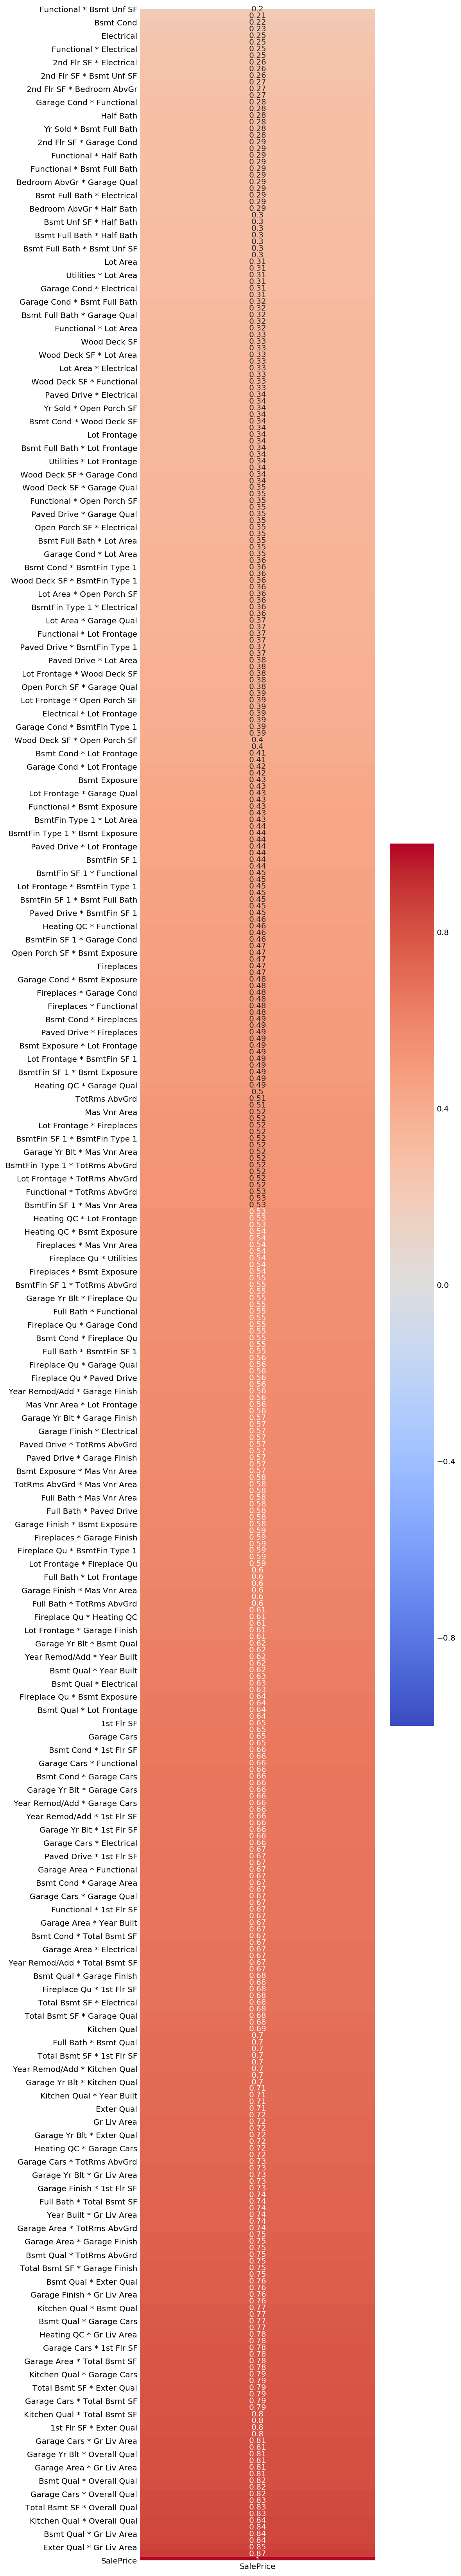

In [1476]:
plt.figure(figsize = (6, 60)) # this figsizes are in inches wide and tall
# need to specify which column you want to sort by, even though there is only 1 column
sns.heatmap(df_train.corr()[['SalePrice']].sort_values('SalePrice'),
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1,
            annot=True);

In [1477]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 109 to 10
Columns: 385 entries, Lot Frontage to SalePrice
dtypes: float64(385)
memory usage: 6.0 MB


## Testing the model

In [1478]:
# Dropping remaining outliers after we tested the models again
df_train.drop([1183, 1783, 2333, 434, 1641, 45], inplace = True)

# from the top
# 182, 1554, 2181, 1499

# from the old linear model, this is what I dropped
# 2181, 1499, 434, 1183, 1783, 2333

In [1479]:
# setting X and y variables
X = df_train.drop(columns = 'SalePrice')
y = df_train['SalePrice']

In [1480]:
#OLS on a test
X_ols = sm.add_constant(X)
est = sm.OLS(y, X.astype(float)).fit()
est.summary()

C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              668.1
Date:                Thu, 16 Jan 2020   Prob (F-statistic):                        0.00
Time:                        18:05:00   Log-Likelihood:                         -22705.
No. Observations:                2041   AIC:                                  4.613e+04
Df Residuals:                    1681   BIC:                                  4.815e+04
Df Model:                         360                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Lot Frontage                      -49.1375     21.584     -2.277      0.023     -91.472      -6.803
Lot Area                         -130.8535    112.418     -1.164      0.245    -351.347      89.640
Overall Qual                     1.481e+05   8.32e+04      1.781      0.075    -1.5e+04    3.11e+05
Year Built                      -1936.1176   3088.057     -0.627      0.531   -7992.959    4120.724
Year Remod/Add                  -2703.7272   2923.061     -0.925      0.355   -8436.949    3029.494
Mas Vnr Area                     4490.1158   4553.995      0.986      0.324   -4441.982    1.34e+04
Exter Qual                      -3.361e+05   2.05e+05     -1.642      0.101   -7.37e+05    6.53e+04
Bsmt Qual                       -1.512e+05   1.37e+05     -1.100      0.271   -4.21e+05    1.18e+05
Bsmt Cond                       -1564.7624   1.98e+04     -0.079      0.937   -4.03e+04    3.72e+04
Bsmt Exposure                    1.929e+06   6.78e+05      2.846      0.004       6e+05    3.26e+06
BsmtFin Type 1                   1.187e+04   1.12e+04      1.056      0.291   -1.02e+04    3.39e+04
BsmtFin SF 1                     -914.9005   2181.380     -0.419      0.675   -5193.407    3363.606
Total Bsmt SF                     496.3960    422.651      1.174      0.240    -332.582    1325.374
Heating QC                       1.037e+04   9574.567      1.083      0.279   -8406.999    2.92e+04
Electrical                       3786.9327   1.38e+04      0.274      0.784   -2.33e+04    3.09e+04
1st Flr SF                       -503.5578    506.065     -0.995      0.320   -1496.142     489.027
2nd Flr SF                        207.7672    200.215      1.038      0.300    -184.930     600.464
Gr Liv Area                     -1313.4862    363.963     -3.609      0.000   -2027.355    -599.617
Bsmt Full Bath                  -1.039e+06   1.77e+06     -0.588      0.557    -4.5e+06    2.43e+06
Full Bath                       -5.032e+04    3.2e+04     -1.572      0.116   -1.13e+05    1.25e+04
Half Bath                        -505.4610   3.01e+04     -0.017      0.987   -5.94e+04    5.84e+04
Kitchen Qual                    -7.072e+04    1.5e+05     -0.471      0.638   -3.65e+05    2.24e+05
TotRms AbvGrd                     2.32e+05   7.02e+04      3.304      0.001    9.43e+04     3.7e+05
Fireplaces                      -1782.3012   2430.808     -0.733      0.464   -6550.031    2985.428
Fireplace Qu                     2713.5958   2367.664      1.146      0.252   -1930.284    7357.476
Garage Yr Blt                    4833.4283   3504.299      1.379      0.168   -2039.821    1.17e+04
Garage Finish                    -2.18e+05   1.27e+05     -1.717      0.086   -4.67e

### Train Test Split

In [1481]:
# running Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [1482]:
# Instantiate Standard Scaler.
sc = StandardScaler()

# Fit AND transform Standard Scaler to data in one step.
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [1483]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [1484]:
# plot predictions function
def plot_predictions(predictions, regression_type):

    # plotting training data for Y hat vs actual Y to find outliers
    plt.figure(figsize=(10,5))

    # Generate a scatterplot of carat versus price.
    plt.scatter(predictions,
                y_train,
                alpha = 0.5)

    plt.xlabel('Predicted Sale Price', fontsize = 15)
    plt.ylabel('Actual Sale Price', fontsize = 15)
    plt.title("Predicting Housing Prices with "+regression_type , fontsize = 24)

    # attempting to annot each value
    training = 0
    for i, txt in y_train.iteritems():
        plt.annotate(i, (predictions[training], y_train[i]))
        training += 1

    # plot the regression line
    plt.plot(predictions,
             predictions,
             color = 'red');
    return

### Linear Regression

In [1562]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train) # or y_train_log

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1563]:
# predicting values for linear regression
y_hat_lr_train = lr.predict(X_train) # or y_hat_lr_train_log
y_hat_lr_test = lr.predict(X_test) # or y_hat_lr_test_log

In [1564]:
# need to test
preds_lr_train = np.exp(y_hat_lr_train)
preds_lr_test = np.exp(y_hat_lr_test)

C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [1566]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9622016606500392
0.8892510511533067


In [1558]:
# this is the 5 fold cross val score
cross_val_score(lr, X_train, y_train_log, cv=5).mean()

0.8438095117407984

In [1567]:
coef_df = pd.DataFrame({
    'column':X.columns,
    'coef': lr.coef_,
    'abs_coef': np.abs(lr.coef_)
})

In [1568]:
coef_df.sort_values(by = 'abs_coef', ascending = False)

,column,coef,abs_coef
9,Bsmt Exposure,2.437210e+06,2.437210e+06
18,Bsmt Full Bath,-2.344097e+06,2.344097e+06
22,TotRms AbvGrd,3.257765e+05,3.257765e+05
277,Utilities * Garage Cars,2.742620e+05,2.742620e+05
2,Overall Qual,2.090812e+05,2.090812e+05
7,Bsmt Qual,1.792662e+05,1.792662e+05
26,Garage Finish,-1.732266e+05,1.732266e+05
8,Bsmt Cond,8.014874e+04,8.014874e+04
27,Garage Cars,6.857480e+04,6.857480e+04
30,Garage Cond,6.614214e+04,6.614214e+04


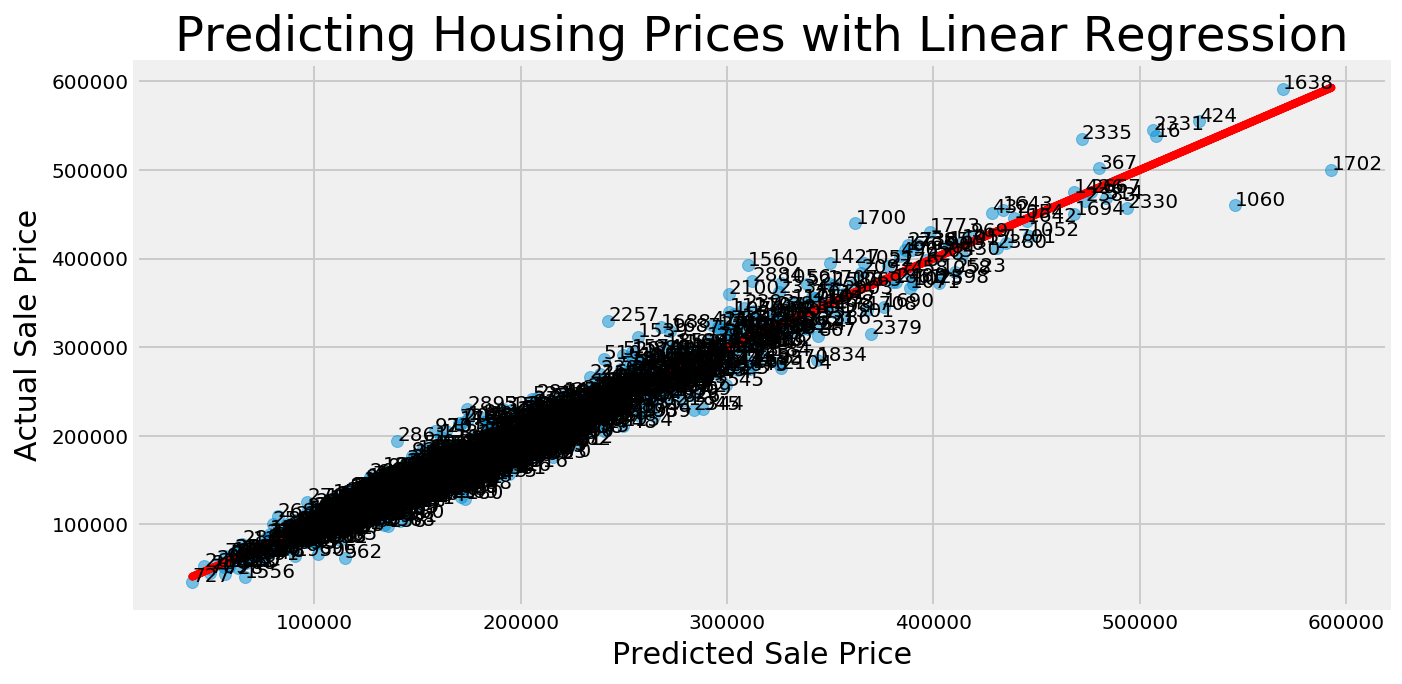

In [1490]:
plot_predictions(preds_lr_train, 'Linear Regression')

In [1491]:
# Mean Squared Errors for Y Training
np.sqrt(mean_squared_error(y_train, preds_lr_train))

15556.233821494567

In [1492]:
# Mean Squared Errors for Y Test
np.sqrt(mean_squared_error(y_test, preds_lr_test))

26272.15881130015

### Ridge Regression ###

In [1493]:
# Set up a list of ridge alphas to check.
# Generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
ridge_alphas = np.linspace(70, 80, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(
    alphas = ridge_alphas,
    scoring = "r2",
    cv = 5) #How many folds

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train_log) # or y_train log 

RidgeCV(alphas=array([70.        , 70.1010101 , 70.2020202 , 70.3030303 , 70.4040404 ,
       70.50505051, 70.60606061, 70.70707071, 70.80808081, 70.90909091,
       71.01010101, 71.11111111, 71.21212121, 71.31313131, 71.41414141,
       71.51515152, 71.61616162, 71.71717172, 71.81818182, 71.91919192,
       72.02020202, 72.12121212, 72.22222222, 72.32323232, 72.42424242,
       72.52525253, 72.62626263, 72.72727273, 72.8...
       77.57575758, 77.67676768, 77.77777778, 77.87878788, 77.97979798,
       78.08080808, 78.18181818, 78.28282828, 78.38383838, 78.48484848,
       78.58585859, 78.68686869, 78.78787879, 78.88888889, 78.98989899,
       79.09090909, 79.19191919, 79.29292929, 79.39393939, 79.49494949,
       79.5959596 , 79.6969697 , 79.7979798 , 79.8989899 , 80.        ]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [1494]:
# Optimal Alpha
ridge_cv.alpha_

76.46464646464646

In [1495]:
print(ridge_cv.score(Z_train, y_train_log))
print(ridge_cv.score(Z_test, y_test_log))

0.9283026123982203
0.91122904082203


In [1496]:
# fitting
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(Z_train, y_train_log) # or y_train_log

Ridge(alpha=76.46464646464646, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [1497]:
# predicting values with Ridge
y_hat_ridge_train = ridge.predict(Z_train) # these are log versions
y_hat_ridge_test = ridge.predict(Z_test)

In [1498]:
# Final Ridge predictions
preds_ridge_train = np.exp(y_hat_ridge_train)
preds_ridge_test = np.exp(y_hat_ridge_test)

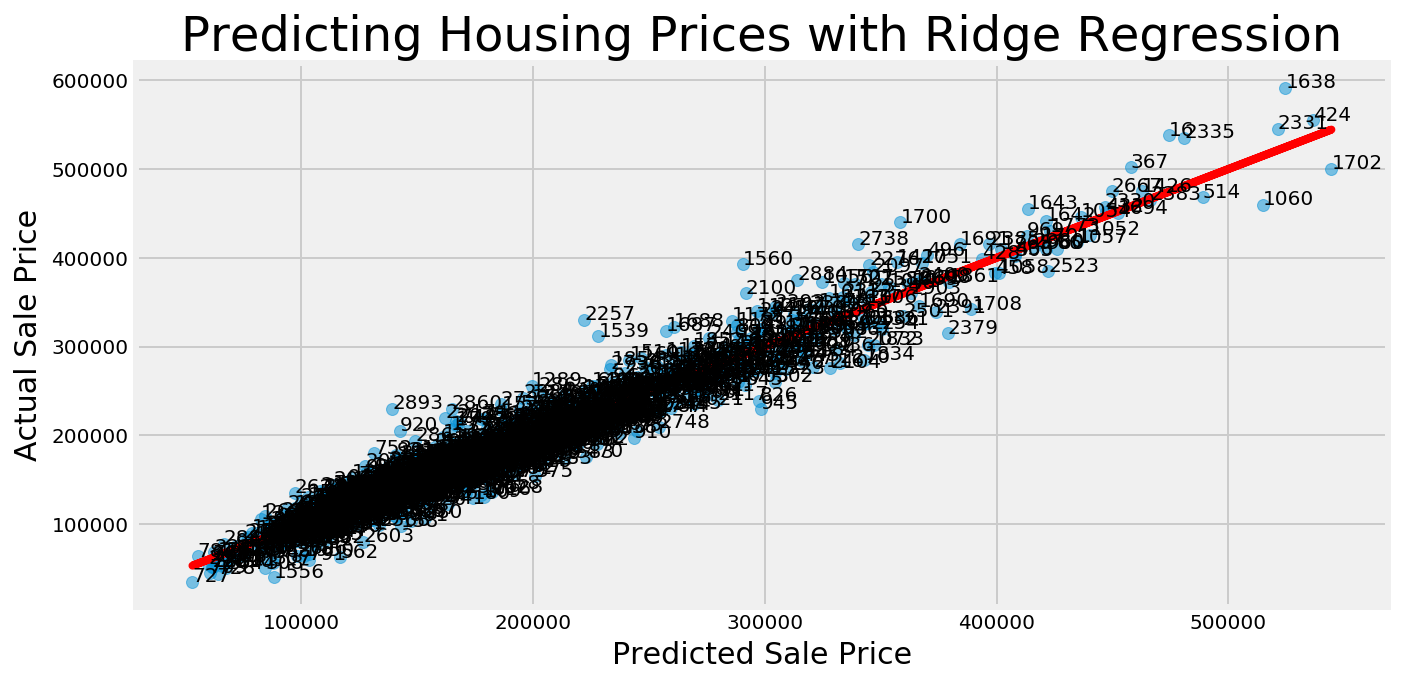

In [1499]:
plot_predictions(preds_ridge_train, 'Ridge Regression')

In [1500]:
# Mean Squared Errors for Y Training
np.sqrt(mean_squared_error(y_train, preds_ridge_train))

18073.919927051495

In [1501]:
# test data linear regression RMSE
np.sqrt(mean_squared_error(y_test, preds_ridge_test)) # keep updating y_test values here for the models

20887.41954486312

### LASSO

In [1502]:
# Set up a list of Lasso alphas to check.
lasso_alphas = np.linspace(0.0015, 0.0018, 100)

# Cross-validate over our list of Lasso alphas.
lasso = LassoCV(
    alphas = lasso_alphas,
    cv = 5,
    max_iter = 5000)

# Fit model using best ridge alpha!
lasso.fit(Z_train, y_train_log)

LassoCV(alphas=array([0.0015    , 0.00150303, 0.00150606, 0.00150909, 0.00151212,
       0.00151515, 0.00151818, 0.00152121, 0.00152424, 0.00152727,
       0.0015303 , 0.00153333, 0.00153636, 0.00153939, 0.00154242,
       0.00154545, 0.00154848, 0.00155152, 0.00155455, 0.00155758,
       0.00156061, 0.00156364, 0.00156667, 0.0015697 , 0.00157273,
       0.00157576, 0.00157879, 0.00158182, 0.00158485, 0.00158788,
       0.00...
       0.00175758, 0.00176061, 0.00176364, 0.00176667, 0.0017697 ,
       0.00177273, 0.00177576, 0.00177879, 0.00178182, 0.00178485,
       0.00178788, 0.00179091, 0.00179394, 0.00179697, 0.0018    ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=5000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [1503]:
lasso.alpha_

0.0017181818181818181

In [1504]:
print(lasso.score(Z_train, y_train_log))
print(lasso.score(Z_test, y_test_log))

0.9185352884325947
0.9079041275776013


In [1505]:
# predicting logged values with Ridge
y_hat_lasso_train = lasso.predict(Z_train)
y_hat_lasso_test = lasso.predict(Z_test)

In [1506]:
# Final Ridge predictions
preds_lasso_train = np.exp(y_hat_lasso_train)
preds_lasso_test = np.exp(y_hat_lasso_test)

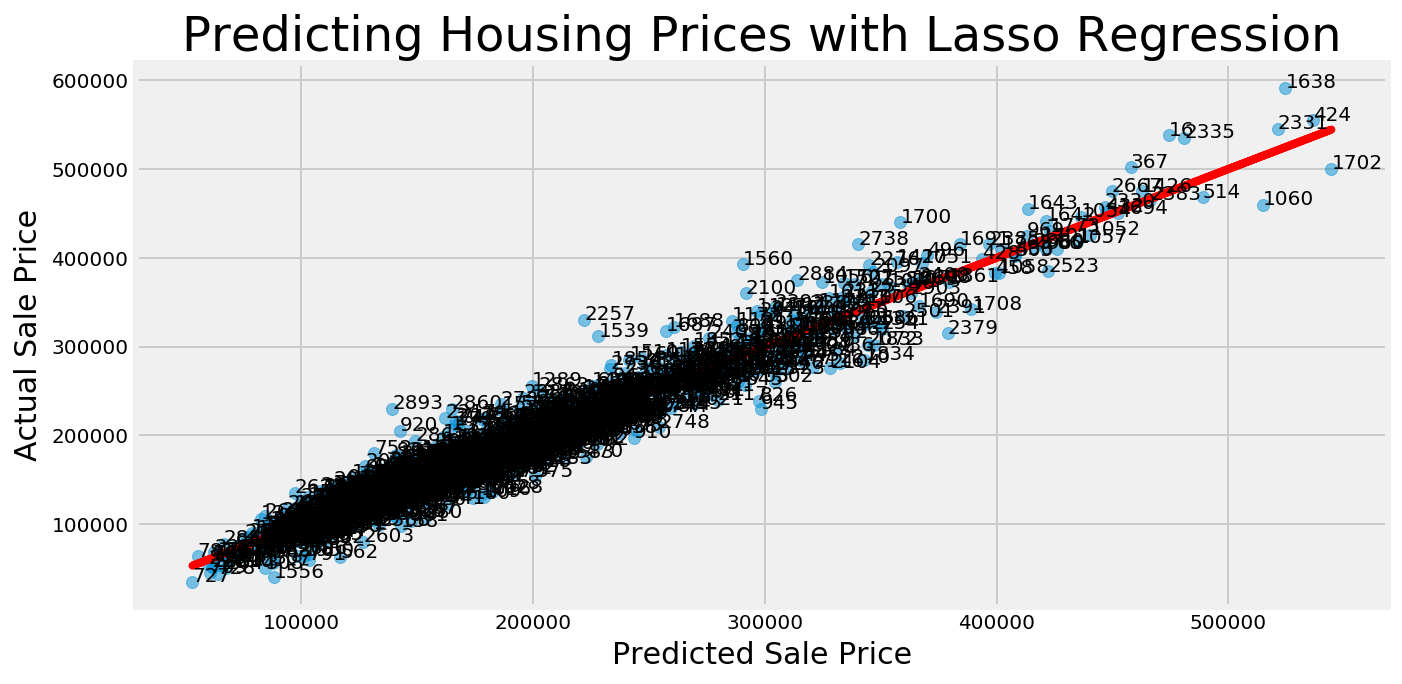

In [1507]:
plot_predictions(preds_ridge_train, 'Lasso Regression')

In [1508]:
# Mean Squared Errors for Y Training
np.sqrt(mean_squared_error(y_train, preds_lasso_train))

19361.581418650076

In [1509]:
# test data linear regression RMSE
np.sqrt(mean_squared_error(y_test, preds_lasso_test))

21391.82874788788

In [1528]:
lasso_coef_df = pd.DataFrame({
    'column':X.columns,
    'coef': lasso.coef_,
    'abs_coef': np.abs(lasso.coef_)
})

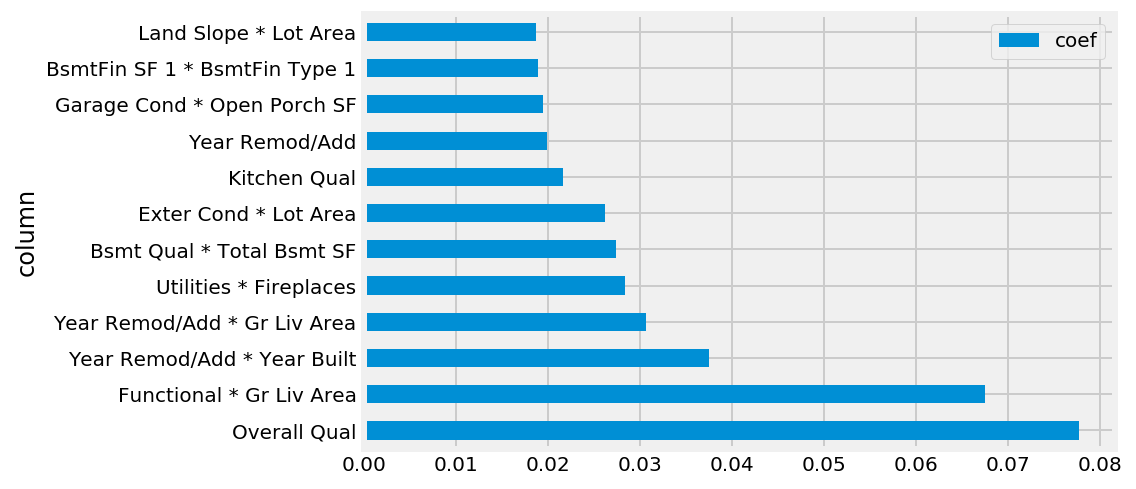

In [1549]:
lasso_coef_df[coef_df['abs_coef'] > 0.018].sort_values(by = 'abs_coef', ascending = False).set_index('column')[['coef']].plot(kind = 'barh')

In [1510]:
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  7.78003277e-02,  0.00000000e+00,
        1.99458573e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.70997636e-03,  1.80104571e-03,
        0.00000000e+00,  1.74311604e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.16440892e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.14145255e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.22338898e-04,  1.12891593e-02,
        1.43185669e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -1.00741397e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        6.85369418e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -

### ElasticNet Regression

In [1511]:
# Create the hyperparameter grid (THINK: how many different hyperparameter combinations are there?)
# Hyperparameters for Elastic Net: (1) Alpha, 2 L1_ratio (rho)
hyperparams = {'alpha': [0.01, 0.1, 1, 10, 100], # originally 0.01, 0.1, 10, 100
              'l1_ratio': [0, 0.2, 0.5, 0.7, 1]} # 0, 0.2, 0.5, 0.7, 1

# Instantiated the GridSearch on a Elastic Net model
enet_gs = GridSearchCV(estimator = ElasticNet(), # estimator is the parent model object
                      param_grid = hyperparams,
                      cv = 5) # param_grid is the test cases for hyperparams
enet_gs.fit(Z_train, y_train_log)


# Fit it to data!                (THINK: How many models are going to be fit?)

C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.974153260836655, tolerance: 0.019588307483087552
  positive)
C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.734660164370205, tolerance: 0.01959798810798281
  positive)
C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.347184380450427, tolerance: 0.02008224514242646
  positive)
C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\co

C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.32284434987924, tolerance: 0.019695586148761955
  positive)
C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.403481307365226, tolerance: 0.019434304215979144
  positive)
C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.473425673112644, tolerance: 0.019588307483087552
  positive)
C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_mode

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.5, 0.7, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1512]:
# See what the best average CV score is
enet_gs.best_score_

0.9092631927708849

In [1513]:
# See which combination of hyperparameters in the grid resulted in this best score
enet_gs.best_params_

{'alpha': 0.1, 'l1_ratio': 0}

In [1514]:
# Notice we can call this object and use it to predict. Let's call this object best_enet
best_enet = enet_gs.best_estimator_
enet_gs.best_estimator_

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [1515]:
# Use this to make predictions and score them
best_enet.score(Z_test, y_test_log)

0.9096118263150516

In [1516]:
# # need to figure out the optimal l1 ratio

# Set up a list of alphas to check.
# enet_alphas = np.linspace(0.0001, 0.001, 1000)

# # Set up our l1 ratio.
# enet_ratio = 0.5

# # Instantiate model.
# enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# # Fit model using optimal alpha.
# enet_model = enet_model.fit(Z_train, y_train_log)

# # Generate predictions.
# enet_model_preds = enet_model.predict(Z_test)
# enet_model_preds_train = enet_model.predict(Z_train)

# # Evaluate model.
# print(enet_model.score(Z_train, y_train_log))
# print(enet_model.score(Z_test, y_test_log))

In [1517]:
# # Here is the optimal value of alpha.
# enet_model.alpha_

In [1518]:
# # Final Enet Predictions
# preds_enet_train = np.exp(enet_model_preds_train)
# preds_enet_test = np.exp(enet_model_preds)

In [1519]:
# plot_predictions(preds_enet_train, 'Enet Regression')

### Kaggle

In [1520]:
X_kaggle = df_test

In [1521]:
X_kaggle_sc = sc.transform(X_kaggle)

In [1522]:
# Ridge Regression
preds_kaggle_log = ridge.predict(X_kaggle_sc)
X_kaggle['SalePrice'] = np.exp(preds_kaggle_log)

In [1523]:
# LASSO Regression
preds_kaggle_log = lasso.predict(X_kaggle_sc)
X_kaggle['SalePrice'] = np.exp(preds_kaggle_log)

In [1524]:
# # Enet Regression
# preds_kaggle_log = enet_model.predict(X_kaggle_sc)
# X_kaggle['SalePrice'] = np.exp(preds_kaggle_log)

In [1525]:
output = X_kaggle[['SalePrice']]

In [1440]:
# Creating CSV file
output.to_csv('./datasets/RidgeRegression_CorrelationsAbove0.2_350InteractionsAdded_4NominalDummies_10OutliersRemoved.csv')